# Final Project Submission - Phase 04

Student Name: GROUP 4

Members : Edward Opollo,Sharon Kimutai,Daniel Ndirangu,Vivian Waitiri,Jackson Maina,Rahma Mohamed,Cynthia Karuga

Student pace: Part Time

Scheduled Project due date: 30th August 2023

This project involves building a time series model using Zillow data to aid real estate investors in making informed investment decisions. The dataset comprises property information, and the project encompasses data preprocessing, time series transformation, exploratory data analysis, model selection, training, and evaluation. The model's objective is to forecast property price trends, which will be presented to investors through a user-friendly interface. Recommendations on where to invest will be provided based on these predictions and supplemented with additional insights from EDA. The project also includes documentation, deployment, maintenance, and a feedback loop to continuously enhance the model's accuracy and relevance to real estate investment needs.

# BUSINESS UNDERSTANDING


This project will significantly enhance business understanding for real estate investors by leveraging time series analysis of Zillow data.

It will provide investors with historical property price trends, helping them make data-driven investment decisions, manage risks, identify promising locations, and access forecasts through a user-friendly interface.

The project's continuous improvement approach, including a feedback loop and regular updates, ensures that investors stay well-informed in a dynamic real estate market, ultimately empowering them to optimize their investments and improve their overall understanding of the industry.

Key factors will be considered like **Return On Investment ROI** of houses,location and risk to recommend for 'BEST INVESTMENT'


# PROJECT OBJECTIVE

The project's main objective is to develop a time series forecasting model using Zillow data to assist real estate investors in making informed decisions about where to invest their capital.

This model will provide predictions and insights into property price trends over time, helping investors identify regions and cities with potential for price appreciation.

Ultimately, the project aims to empower investors with data-driven tools that enhance their understanding of real estate market dynamics, enabling them to make more strategic and profitable investment choices.

**The key question being:What are the top 5 best zip codes for us to invest in?**

# Group 4 Team Strategy #

1. ROI as our meassure of best zipcodes to invest.
2. Compare zip codes based on ROI and select the top 5
3. Evaluate the zipcodes for trends and seasonality
4. Detrend the data to stationarity
5. Model the data
6. Forcast the data
7. Recomend areas based on forecast

# DATA UNDERSTANDING

In [ ]:
#import relevant liblaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# read the zillow_data.csv
df = pd.read_csv('/content/zillow_data.csv')
#inspect the data
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [ ]:
# get info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [ ]:
# check the datatypes
df_data_types = df.dtypes
df_data_types

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 272, dtype: object

In [ ]:
#check the summary statistics
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [ ]:
# convert the datae columns from strings to dates
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """

    try:
        return pd.to_datetime(df.columns.values[1:], format='%Y-%m', errors='coerce')
    except Exception as e:
        return str(e)

# Filter the data
Want to select the best zip codes (RegionName) to invest in.

The best here is Return on investment (ROI)

In [ ]:
# Check the number of unique RegionNames
num_unique_regionName = df['RegionName'].nunique()

# Print the result
print("Number of unique RegionNames:", num_unique_regionName)


Number of unique RegionNames: 14723


In [ ]:
#check the number of unique RegionID
num_unique_regionID = df['RegionID'].nunique()
num_unique_regionID

14723

In [ ]:
#filter RegionName
# Recalculate the number of years between the earliest and latest date
years_difference = (2018 - 1996) + (4/12)

# Calculate the Annualized ROI for each RegionName
df['Annualized_ROI'] = ((df['2018-04'] / df['1996-04'])**(1/years_difference) - 1) * 100
#annualized_roi_df = df[['RegionName', 'City', 'State', 'Annualized_ROI']]

# Sort the DataFrame based on Annualized_ROI in descending order
sorted_annualized_roi_df = df.sort_values(by='Annualized_ROI', ascending=False)


In [ ]:
#Reveal the top 5 Regional names in terms of zipcode
sorted_annualized_roi_df.head(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Annualized_ROI
117,62022,11211,New York,NY,New York,Kings,118,133200.0,132900.0,132500.0,...,1406400,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700,11.847669
1155,62033,11222,New York,NY,New York,Kings,1156,149200.0,148400.0,147500.0,...,1623800,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100,11.571663
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1506100,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700,11.308317
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,...,1372300,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300,11.056640
106,62026,11215,New York,NY,New York,Kings,107,225700.0,227500.0,229400.0,...,2201100,2244400,2266100,2275800,2287100,2288900,2265300,2244900,2243900,10.831426


In [ ]:
#check the datatypes for the sorted_annualized_roi
Sorted_data_types = sorted_annualized_roi_df.dtypes
Sorted_data_types

RegionID            int64
RegionName          int64
City               object
State              object
Metro              object
                   ...   
2018-01             int64
2018-02             int64
2018-03             int64
2018-04             int64
Annualized_ROI    float64
Length: 273, dtype: object

# EDA

### Visualisations of the ROI

### Anualised ROI by state

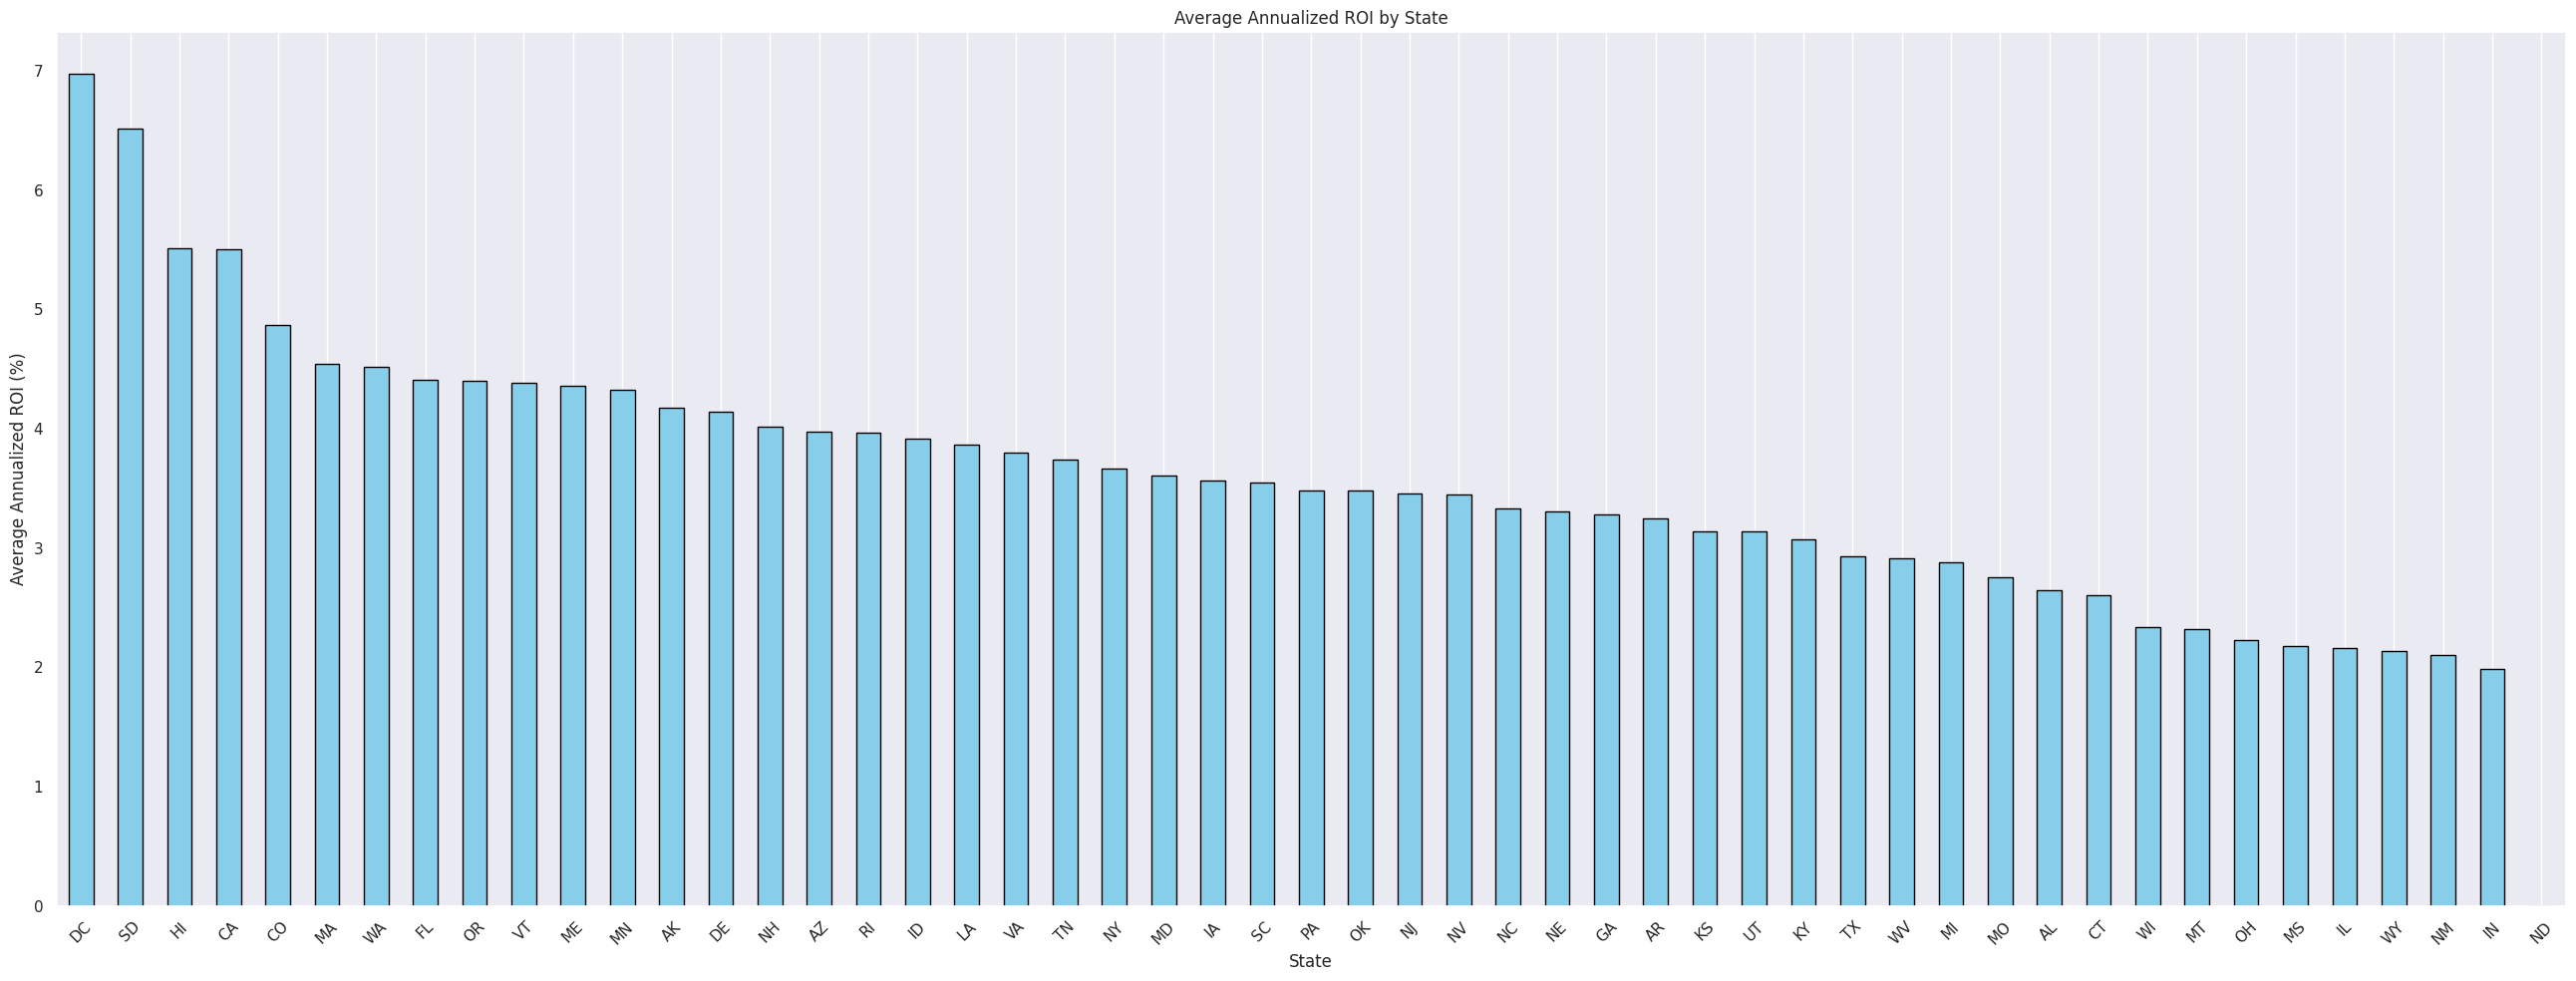

In [ ]:
# Calculate the average Annualized_ROI by state
avg_roi_by_state = sorted_annualized_roi_df.groupby('State')['Annualized_ROI'].mean().sort_values(ascending=False)

# Plot the average Annualized_ROI by state
plt.figure(figsize=(26, 10))
avg_roi_by_state.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Annualized ROI by State')
plt.ylabel('Average Annualized ROI (%)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

The **District of Columbia (DC**) leads with the highest average of Annualized ROI.
There is a noticeable variance in average ROI across states, with some states having ROIs above 5% and others below 3%.

### Distribution of the ROI

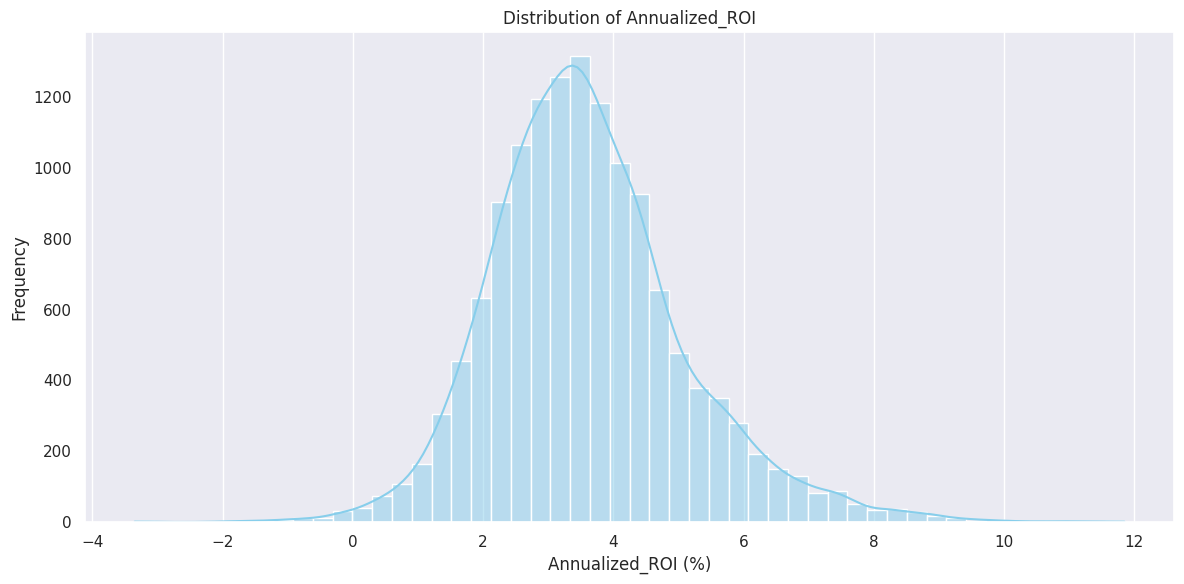

In [ ]:
# Plot the distribution of Annualized_ROI
plt.figure(figsize=(12, 6))
sns.histplot(sorted_annualized_roi_df['Annualized_ROI'], kde=True, color='skyblue', bins=50)
plt.title('Distribution of Annualized_ROI')
plt.xlabel('Annualized_ROI (%)')
plt.ylabel('Frequency')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

This means the areas we are focusing on are at the extreme end of the distribution as they have more than 10% ROI

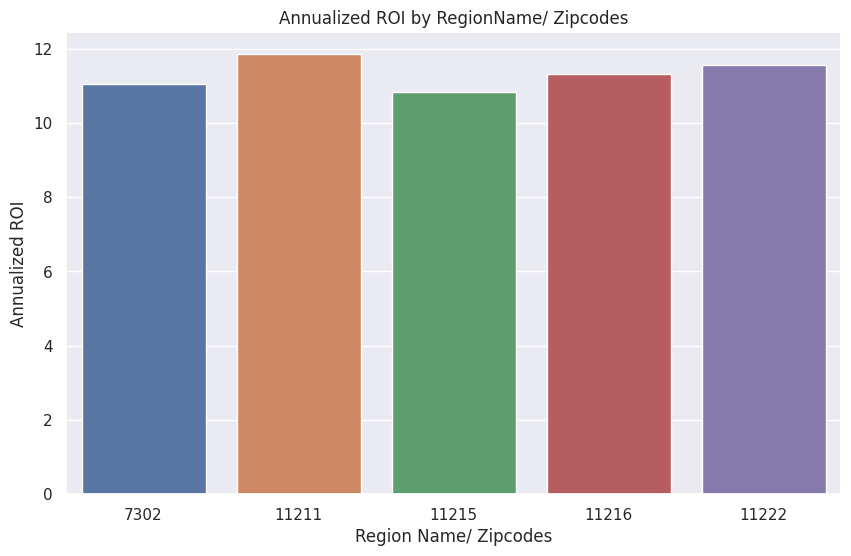

In [ ]:
# create a visualization of the RegionName and the ROI

# Extract first 5 rows and selected columns
sub_df = sorted_annualized_roi_df.head(5)[['RegionName', 'Annualized_ROI']]

# sub_df = sorted_annualized_roi_df.loc[:4, ['RegionName', 'Annualized_ROI']]

# Create bar graph using Seaborn
sns.barplot(x='RegionName', y='Annualized_ROI', data=sub_df)
sns.set(rc={"figure.figsize":(10, 6)})
plt.xlabel('Region Name/ Zipcodes')
plt.ylabel('Annualized ROI')
plt.title('Annualized ROI by RegionName/ Zipcodes')
plt.show()

# check for uniqe zipcodes
I wanted to check if the zip codes we are dealing with are actually unique therefore the below is a modified code to request for unique regional Names (zipcodes)

In [ ]:
#Edwards Zipcode (RegionID-62022, RegionName-11211, City-NewYork, State-NY, Metro-NewYork, CountyName - Kings)
selected_zipcode = sorted_annualized_roi_df.iloc[0]
selected_zipcode

RegionID              62022
RegionName            11211
City               New York
State                    NY
Metro              New York
                    ...    
2018-01             1496100
2018-02             1531100
2018-03             1581900
2018-04             1623700
Annualized_ROI    11.847669
Name: 117, Length: 273, dtype: object

In [ ]:
#data frame of Edwards Zipcode (RegionID-62022, RegionName-11211, City-NewYork, State-NY, Metro-NewYork, CountyName - Kings)
selected_zipcode = sorted_annualized_roi_df.iloc[0]
df_zip1 = pd.DataFrame([selected_zipcode])
df_zip1.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,Annualized_ROI
117,62022,11211,New York,NY,New York,Kings,118,133200.0,132900.0,132500.0,...,1406400,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700,11.847669


In [ ]:
df_zip1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 117 to 117
Columns: 273 entries, RegionID to Annualized_ROI
dtypes: float64(220), int64(49), object(4)
memory usage: 2.1+ KB


In [ ]:
 #convert the datae columns from strings to dates
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """

    try:
        return pd.to_datetime(df.columns.values[1:], format='%Y-%m', errors='coerce')
    except Exception as e:
        return str(e)

In [ ]:
zipcodedates = get_datetimes(df_zip1)
zipcodedates

DatetimeIndex([       'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT', '1996-04-01', '1996-05-01',
               '1996-06-01', '1996-07-01',
               ...
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01',        'NaT'],
              dtype='datetime64[ns]', length=272, freq=None)

In [ ]:
# create function melt that will transform the data frame from wide formart to long format
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.
    Returns a long-form datetime dataframe
    with the datetime column names as the index and the values as the 'values' column.

    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """

    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [ ]:
# Subset the DataFrame to include only columns 7 to 272
subset_columns = df_zip1.columns[7:272]
df_subset = df_zip1[subset_columns]

# Use pd.melt() to convert from wide to long format
df_zip1Transformed = pd.melt(df_subset, var_name='Column', value_name='Value')

df_zip1Transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Column  265 non-null    object 
 1   Value   265 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [ ]:
df_zip1Transformed.head()

,Column,Value
0,1996-04,133200.0
1,1996-05,132900.0
2,1996-06,132500.0
3,1996-07,132200.0
4,1996-08,131800.0


In [ ]:
# Convert the "Column" column to datetime format
df_zip1Transformed["Column"] = pd.to_datetime(df_zip1Transformed["Column"])

# Set the "Column" column as the index
df_zip1Transformed.set_index("Column", inplace=True)

# Now your DataFrame will have the "Column" column transformed to datetime and set as the index



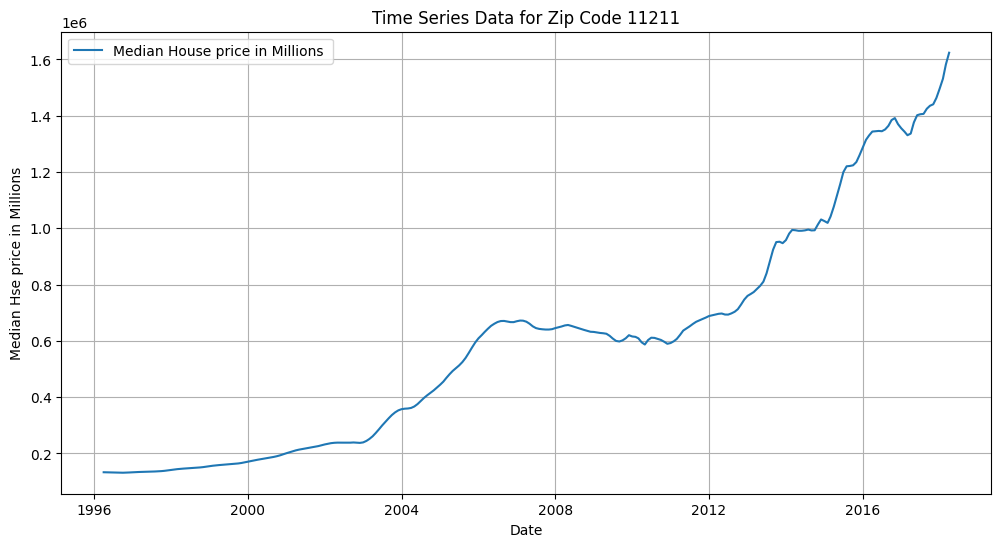

In [ ]:
df_zipcode1_11211 = df_zip1Transformed.copy()

# Visualize zip code 11211 Median house price over the data
plt.figure(figsize=(12, 6))
plt.plot(df_zipcode1_11211.index, df_zipcode1_11211['Value'], label='Median House price in Millions ')
plt.title('Time Series Data for Zip Code 11211')
plt.xlabel('Date')
plt.ylabel('Median Hse price in Millions')
plt.legend()
plt.grid(True)
plt.show()

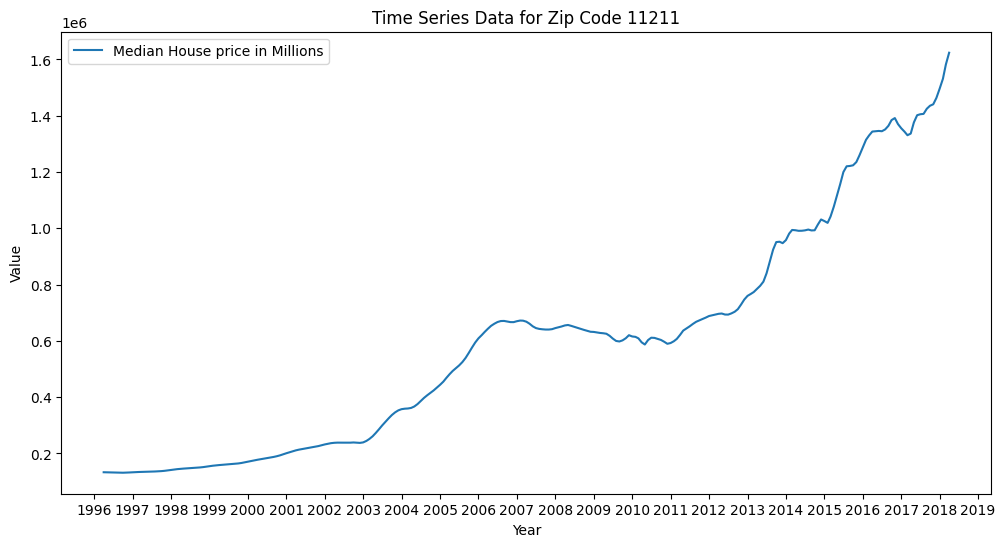

In [ ]:
#Visualise Median house prices for zip 11211 on an anual basis

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_zipcode1_11211.index, df_zipcode1_11211['Value'], label='Median House price in Millions')

# Set x-axis ticks at yearly intervals
years = mdates.YearLocator()  # Specify the interval as years
year_format = mdates.DateFormatter('%Y')  # Format the tick labels as years
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(year_format)

plt.title('Time Series Data for Zip Code 11211')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
# plt.grid(True)
plt.show()


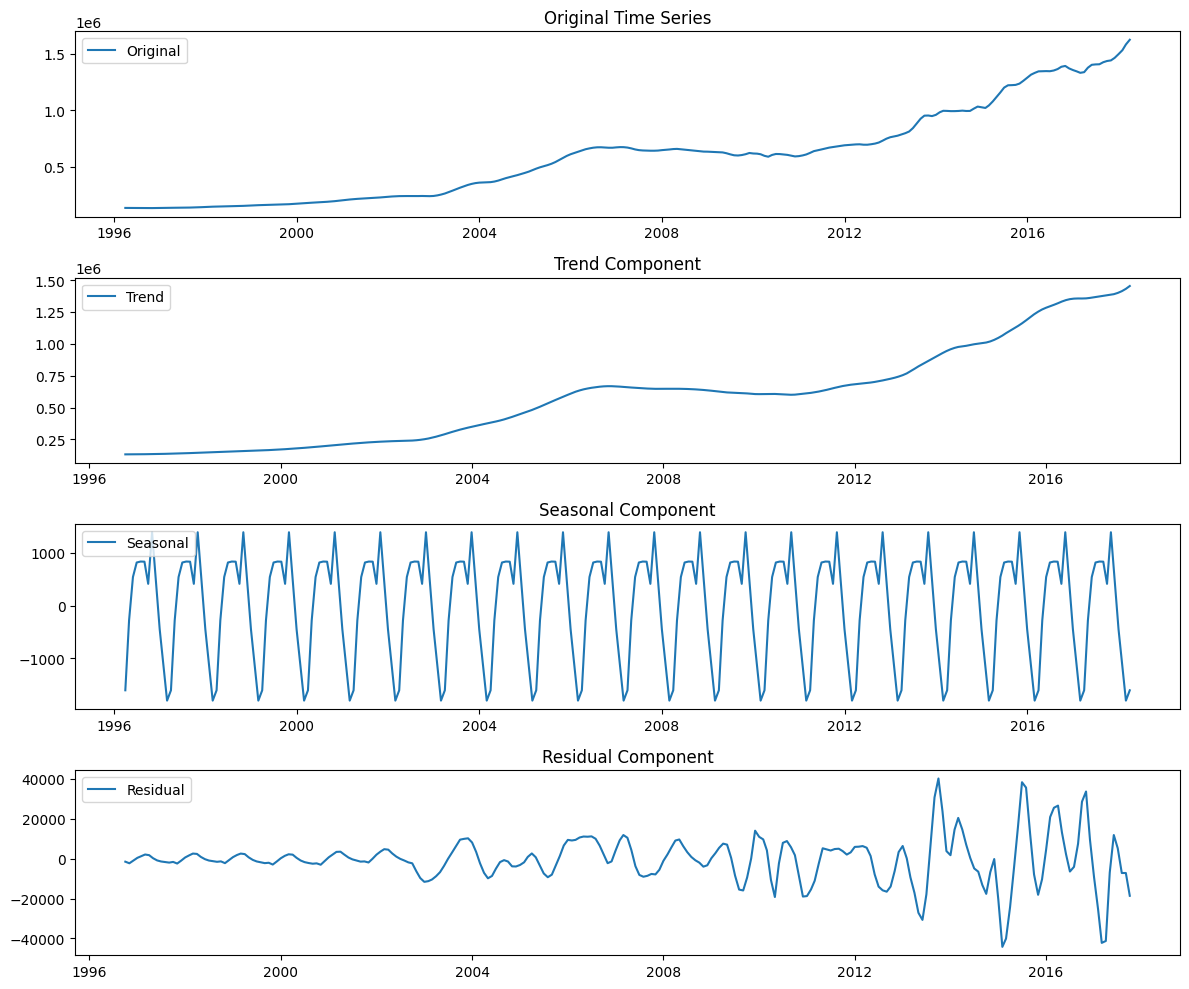

In [ ]:

# Assuming df_zipcode1_11211 is your renamed DataFrame with datetime index

# Perform seasonal decomposition
result = sm.tsa.seasonal_decompose(df_zipcode1_11211['Value'], model='additive')

# Visualization
plt.figure(figsize=(12, 10))

# Original time series
plt.subplot(411)
plt.plot(df_zipcode1_11211.index, df_zipcode1_11211['Value'], label='Original')
plt.legend()
plt.title('Original Time Series')

# Trend component
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.title('Trend Component')

# Seasonal component
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Component')

# Residual component
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend()
plt.title('Residual Component')

plt.tight_layout()
plt.show()


In [ ]:

# Assuming df_zipcode1_1211 is your renamed DataFrame with datetime index
# Perform Dickey-Fuller test
result = adfuller(df_zipcode1_11211['Value'])

# Extract and print the test results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Lags Used:", result[2])
print("Number of Observations:", result[3])
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")


ADF Statistic: 1.9884026968017572
p-value: 0.9986576909330424
Lags Used: 15
Number of Observations: 249
Critical Values:
	1%: -3.4568881317725864
	5%: -2.8732185133016057
	10%: -2.5729936189738876


In the Dickey-Fuller test results, the key value to focus on is the p-value.

The null hypothesis of the test is that the time series is not stationary.

If the p-value is less than a chosen significance level (e.g., 0.05), then you can reject the null hypothesis and consider the time series as stationary.

1. **ADF Statistic**: The ADF statistic is 1.9884026968017572.
2. **p-value**: The p-value associated with the test is 0.9986576909330424. it needs to be lower than 0.1, 0.05 or 0.001 to reject the null hypotheis. This means that the data is likely non-stationary.

3. **Lags Used**: The number of lagged differences included in the regression equation is 15.
4. **Number of Observations**: The number of data points in your sample is 249.
5. **Critical Values**: These are the values that are compared to the ADF statistic to make a decision about stationarity. If the ADF statistic is less negative than these critical values, you would likely fail to reject the null hypothesis of non-stationarity.

Based on the ADF statistic, p-value, and critical values, it obvious that this data is non-stationary.




In [ ]:

# Fit a polynomial of degree 1 (linear trend)
coefficients = np.polyfit(np.arange(len(df_zipcode1_11211['Value'])), df_zipcode1_11211['Value'], 1)
trend = np.polyval(coefficients, np.arange(len(df_zipcode1_11211['Value'])))
df_zipcode1_11211['Detrended'] = df_zipcode1_11211['Value'] - trend

# Perform Dickey-Fuller test on the detrended data
result_detrended_poly = adfuller(df_zipcode1_11211['Detrended'])


# Extract and print the test results
print("ADF Statistic:", result_detrended_poly[0])
print("p-value:", result_detrended_poly[1])
print("Lags Used:", result_detrended_poly[2])
print("Number of Observations:", result_detrended_poly[3])
print("Critical Values:")

ADF Statistic: -0.3677419548248443
p-value: 0.915346997593078
Lags Used: 15
Number of Observations: 249
Critical Values:


In [ ]:
df_zipcode1_11211.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Value      265 non-null    float64
 1   Detrended  265 non-null    float64
dtypes: float64(2)
memory usage: 6.2 KB


In [ ]:
df_zipcode1_11211.head(5)

,Value,Detrended
Column,,
1996-04-01,133200.0,183467.708895
1996-05-01,132900.0,178278.050723
1996-06-01,132500.0,172988.392551
1996-07-01,132200.0,167798.734379
1996-08-01,131800.0,162509.076207


Use differencing to detrend the data, vizualise the data and perform dicky fuller test

Dickey-Fuller Test - Original Data:
ADF Statistic: 1.9884026968017572
p-value: 0.9986576909330424

Dickey-Fuller Test - Differenced Data:
ADF Statistic: -2.381052503304751
p-value: 0.147155764368466


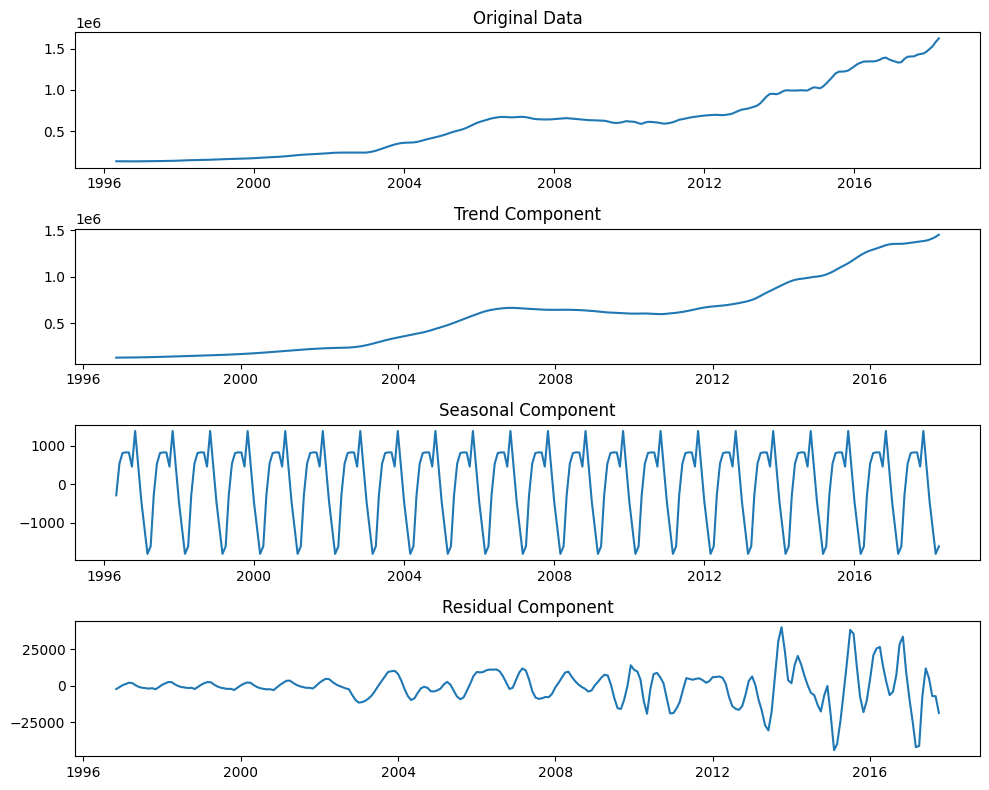


Dickey-Fuller Test - Residual Component:
ADF Statistic: -6.726629093715725
p-value: 3.3767963874870046e-09


In [ ]:

# Replace missing values with the mean of the column
mean_value = df_zipcode1_11211['Value'].mean()
df_zipcode1_11211['Value'].fillna(mean_value, inplace=True)

# Perform Dickey-Fuller test on the original data
result_original = adfuller(df_zipcode1_11211['Value'])
print("Dickey-Fuller Test - Original Data:")
print("ADF Statistic:", result_original[0])
print("p-value:", result_original[1])

# Perform first-order differencing to detrend the data
df_zipcode1_11211['Differenced'] = df_zipcode1_11211['Value'].diff()

# Drop NaN values from the 'Differenced' column
df_zipcode1_11211.dropna(subset=['Differenced'], inplace=True)

# Perform Dickey-Fuller test on the differenced data
result_differenced = adfuller(df_zipcode1_11211['Differenced'])
print("\nDickey-Fuller Test - Differenced Data:")
print("ADF Statistic:", result_differenced[0])
print("p-value:", result_differenced[1])

# Visualize the detrended data using seasonal decomposition
result_decompose = seasonal_decompose(df_zipcode1_11211['Value'], model='additive')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
ax1.set_title("Original Data")
ax1.plot(df_zipcode1_11211['Value'])
ax2.set_title("Trend Component")
ax2.plot(result_decompose.trend)
ax3.set_title("Seasonal Component")
ax3.plot(result_decompose.seasonal)
ax4.set_title("Residual Component")
ax4.plot(result_decompose.resid)
plt.tight_layout()
plt.show()

# Perform Dickey-Fuller test on the residual component of seasonal decomposition
result_residual = adfuller(result_decompose.resid.dropna())
print("\nDickey-Fuller Test - Residual Component:")
print("ADF Statistic:", result_residual[0])
print("p-value:", result_residual[1])


Moving Average Detrending:

You'll compute a moving average (rolling mean) over the data.
Detrend the series by subtracting the moving average from the original series.
Polynomial Fit Detrending:

You'll fit a polynomial to the original series.
Detrend the series by subtracting the polynomial fit from the original series.
Visualization using Seasonal Decomposition:

Use the seasonal_decompose method to decompose each detrended series.
Dickey-Fuller Test:

Run the test on each detrended series and print the results

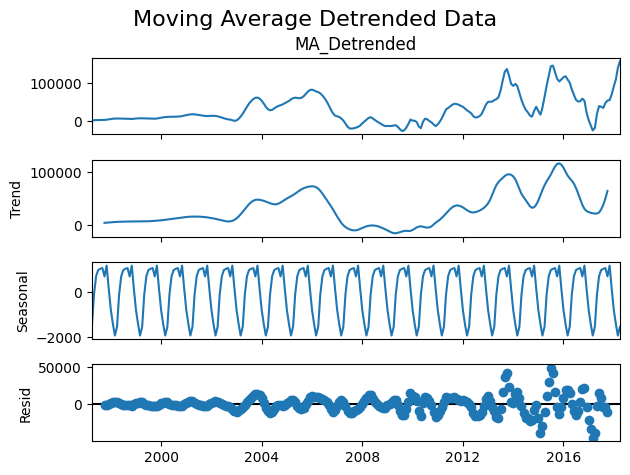

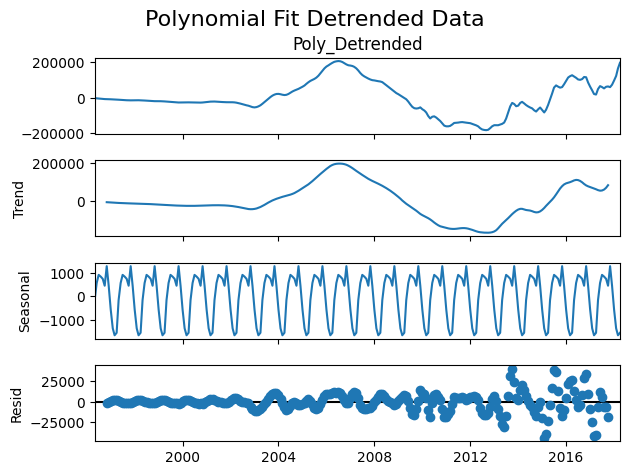


Dickey-Fuller Test - Moving Average Detrended Data:
ADF Statistic: -1.3477251447263607
p-value: 0.6070652553361573

Dickey-Fuller Test - Polynomial Fit Detrended Data:
ADF Statistic: -1.3433145407605396
p-value: 0.6091304061982992


In [ ]:
# Convert datetime index into integer timestamps and scale down for stability
x_values = df_zipcode1_11211.index.astype(int) / 1e18

# 1. Moving Average Detrending
window_size = 12  # Adjust based on your data's seasonality or desired window
df_zipcode1_11211['Moving_Average'] = df_zipcode1_11211['Value'].rolling(window=window_size).mean()
df_zipcode1_11211['MA_Detrended'] = df_zipcode1_11211['Value'] - df_zipcode1_11211['Moving_Average']

# 2. Polynomial Fit Detrending
degree = 2  # Change degree as needed
coefficients = np.polyfit(x_values, df_zipcode1_11211['Value'], degree)
polynomial_fit = np.poly1d(coefficients)
df_zipcode1_11211['Poly_Fit'] = polynomial_fit(x_values)
df_zipcode1_11211['Poly_Detrended'] = df_zipcode1_11211['Value'] - df_zipcode1_11211['Poly_Fit']

# 3. Visualize detrended models using seasonal decomposition
def decompose_and_plot(series, title):
    result = seasonal_decompose(series.dropna(), model='additive')
    result.plot().suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

decompose_and_plot(df_zipcode1_11211['MA_Detrended'], "Moving Average Detrended Data")
decompose_and_plot(df_zipcode1_11211['Poly_Detrended'], "Polynomial Fit Detrended Data")

# 4. Dickey-Fuller Test
def perform_adfuller(series, title):
    result = adfuller(series.dropna())
    print(f"\nDickey-Fuller Test - {title}:")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])

perform_adfuller(df_zipcode1_11211['MA_Detrended'], "Moving Average Detrended Data")
perform_adfuller(df_zipcode1_11211['Poly_Detrended'], "Polynomial Fit Detrended Data")


From the results, only the residual component after seasonal decomposition appears to be stationary with a very low p-value. The other methods still result in a non-stationary time series.

To further detrend the data, we can consider the following:

Higher Order Differencing: Sometimes, differencing once isn't enough. You can try differencing the series multiple times until it becomes stationary.

Log Transformation: Taking the logarithm of a series can help in stabilizing the variance. After this, you might need to perform differencing.

Combining Methods: You can try differencing after removing the trend using moving average or polynomial fitting.



In [ ]:
# 1. Higher Order Differencing
df_zipcode1_11211['Differenced_2'] = df_zipcode1_11211['Value'].diff().diff()
result_diff2 = adfuller(df_zipcode1_11211['Differenced_2'].dropna())
print("\nDickey-Fuller Test - Second Order Differenced Data:")
print("ADF Statistic:", result_diff2[0])
print("p-value:", result_diff2[1])

# 2. Log Transformation followed by Differencing
df_zipcode1_11211['Log'] = np.log(df_zipcode1_11211['Value'])
df_zipcode1_11211['Log_Diff'] = df_zipcode1_11211['Log'].diff()
result_log_diff = adfuller(df_zipcode1_11211['Log_Diff'].dropna())
print("\nDickey-Fuller Test - Log and Differenced Data:")
print("ADF Statistic:", result_log_diff[0])
print("p-value:", result_log_diff[1])

# 3. Combine Moving Average Detrending and Differencing
df_zipcode1_11211['MA_Detrended_Diff'] = df_zipcode1_11211['MA_Detrended'].diff()
result_ma_diff = adfuller(df_zipcode1_11211['MA_Detrended_Diff'].dropna())
print("\nDickey-Fuller Test - Moving Average Detrended and Differenced Data:")
print("ADF Statistic:", result_ma_diff[0])
print("p-value:", result_ma_diff[1])



Dickey-Fuller Test - Second Order Differenced Data:
ADF Statistic: -6.053705228619373
p-value: 1.2597717620125383e-07

Dickey-Fuller Test - Log and Differenced Data:
ADF Statistic: -2.658904032234302
p-value: 0.08142360208971872

Dickey-Fuller Test - Moving Average Detrended and Differenced Data:
ADF Statistic: -5.671735929573753
p-value: 8.890029207024908e-07


In [ ]:
df_zipcode1_11211

,Value,Detrended,Differenced,Moving_Average,MA_Detrended,Poly_Fit,Poly_Detrended,Differenced_2,Log,Log_Diff,MA_Detrended_Diff
Column,,,,,,,,,,,
1996-05-01,132900.0,178278.050723,-300.0,NaN,NaN,1.351351e+05,-2235.135525,NaN,11.797352,NaN,NaN
1996-06-01,132500.0,172988.392551,-400.0,NaN,NaN,1.358721e+05,-3372.099649,NaN,11.794338,-0.003014,NaN
1996-07-01,132200.0,167798.734379,-300.0,NaN,NaN,1.366168e+05,-4416.817945,100.0,11.792071,-0.002267,NaN
1996-08-01,131800.0,162509.076207,-400.0,NaN,NaN,1.374189e+05,-5618.938297,-100.0,11.789041,-0.003030,NaN
1996-09-01,131600.0,157419.418035,-200.0,NaN,NaN,1.382542e+05,-6654.170831,200.0,11.787522,-0.001519,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,1463100.0,242056.584171,22600.0,1.393200e+06,69900.000000,1.389199e+06,73901.300194,17400.0,14.196068,0.015567,14850.000000
2018-01-01,1496100.0,270166.925999,33000.0,1.404933e+06,91166.666667,1.398357e+06,97743.160637,10400.0,14.218372,0.022304,21266.666667
2018-02-01,1531100.0,300277.267827,35000.0,1.420592e+06,110508.333333,1.407548e+06,123551.908898,2000.0,14.241497,0.023125,19341.666667


In [ ]:
df_zipcode1_11211.head()

,Value,Detrended,Differenced,Moving_Average,MA_Detrended,Poly_Fit,Poly_Detrended,Differenced_2,Log,Log_Diff,MA_Detrended_Diff
Column,,,,,,,,,,,
1996-05-01,132900.0,178278.050723,-300.0,NaN,NaN,135135.135525,-2235.135525,NaN,11.797352,NaN,NaN
1996-06-01,132500.0,172988.392551,-400.0,NaN,NaN,135872.099649,-3372.099649,NaN,11.794338,-0.003014,NaN
1996-07-01,132200.0,167798.734379,-300.0,NaN,NaN,136616.817945,-4416.817945,100.0,11.792071,-0.002267,NaN
1996-08-01,131800.0,162509.076207,-400.0,NaN,NaN,137418.938297,-5618.938297,-100.0,11.789041,-0.003030,NaN
1996-09-01,131600.0,157419.418035,-200.0,NaN,NaN,138254.170831,-6654.170831,200.0,11.787522,-0.001519,NaN


In [ ]:
# still needs further differencing as 0.08 is still higher than 0.05
# Your original DataFrame df_zipcode1_11211 and its column 'Value'
# This is just a placeholder; your original DataFrame will replace this

# Log Transformation
df_zipcode1_11211['Log'] = np.log(df_zipcode1_11211['Value'])

# First Differencing
df_zipcode1_11211['Log_Diff'] = df_zipcode1_11211['Log'].diff()

# ADF test on first differencing
result_log_diff = adfuller(df_zipcode1_11211['Log_Diff'].dropna())
print("\nDickey-Fuller Test - Log and First Differenced Data:")
print("ADF Statistic:", result_log_diff[0])
print("p-value:", result_log_diff[1])

# Second Differencing
df_zipcode1_11211['Log_Diff_2'] = df_zipcode1_11211['Log_Diff'].diff()

# ADF test on second differencing
result_log_diff_2 = adfuller(df_zipcode1_11211['Log_Diff_2'].dropna())
print("\nDickey-Fuller Test - Log and Second Differenced Data:")
print("ADF Statistic:", result_log_diff_2[0])
print("p-value:", result_log_diff_2[1])




Dickey-Fuller Test - Log and First Differenced Data:
ADF Statistic: -2.658904032234302
p-value: 0.08142360208971872

Dickey-Fuller Test - Log and Second Differenced Data:
ADF Statistic: -5.809112267507018
p-value: 4.4442208125919053e-07


In [ ]:
#The p-value 4.4442208125919053e-07 can be written as 0.0000000044442208125919053. this is close to zero and indicates the data is stationary

# MODELING

Having detrended the timeseries, we now prepare to model it

### Start by investingaiting ACF and PACF of the time series

<Figure size 1200x400 with 0 Axes>

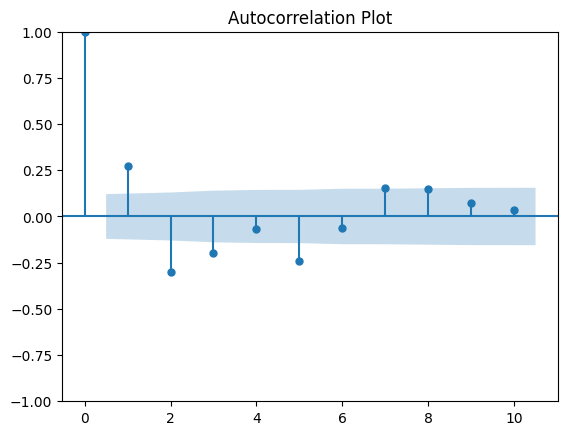

<Figure size 1200x400 with 0 Axes>

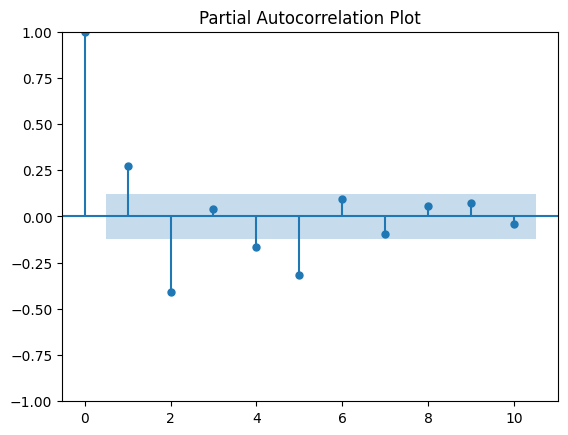

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming that df_zipcode1_11211['Log_Diff_2'] is your second differenced series
second_diff_series = df_zipcode1_11211['Log_Diff_2'].dropna()

# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(second_diff_series, lags=10, title='Autocorrelation Plot')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(second_diff_series, lags=10, title='Partial Autocorrelation Plot')
plt.show()


The **ACF** plot helps you understand the correlation between an element and its preceding elements. For an ARIMA model, this will help us determine the MA (Moving Average) component.

The **PACF** plot shows the correlation between an element and its preceding elements but removes the influence of intervening points. It helps us decide the AR (AutoRegressive) component for the ARIMA model.

A sharp drop in ACF after lag k suggests an MA(k) model might be suitable.

A gradual decline suggests an AR model. The PACF plot can similarly guide the selection of AR terms.

Based on the ACF and PACF plots, we will then proceed to fit an ARIMA model with the appropriate parameters.

based on this result, I will be using log and differenced data to test which modeling will work before I apply it to the rest of the dataset

# **Modeling**

#ARIMA

1.Splits the log-transformed data into 80% training and 20% test sets.

2.Fits an ARIMA(1,1,1) model to the training data.

3.Prints a summary of the fitted model.

4.Makes out-of-sample predictions on the test set.

5.Calculates the Mean Absolute Error of the predictions compared to the actual test data.

6.Plots the training data, test data, and predictions on the same plot for visual comparison.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown ke

                               SARIMAX Results                                
Dep. Variable:                    Log   No. Observations:                  211
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 796.621
Date:                Thu, 31 Aug 2023   AIC                          -1587.242
Time:                        15:10:47   BIC                          -1577.201
Sample:                    05-01-1996   HQIC                         -1583.183
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8632      0.035     24.871      0.000       0.795       0.931
ma.L1          0.4957      0.033     15.030      0.000       0.431       0.560
sigma2      2.936e-05   1.39e-06     21.186      0.0

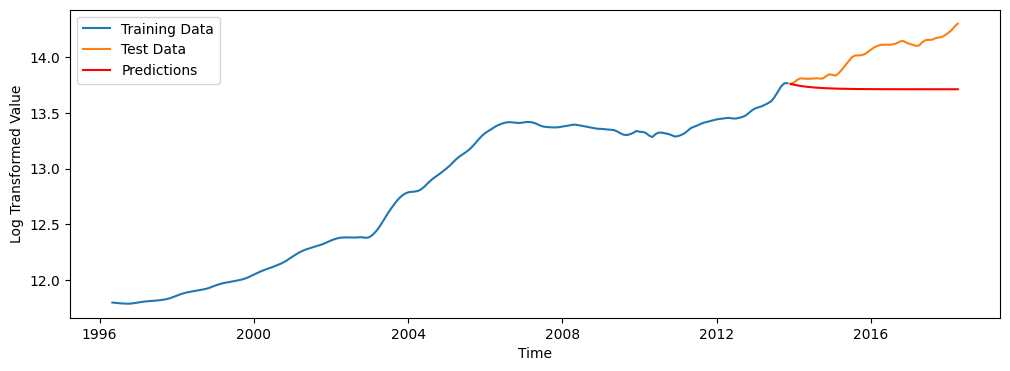

In [ ]:
import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error

#log-transformed series
log_series = df_zipcode1_11211['Log'].dropna()

# Split data into training and test sets
train_size = int(len(log_series) * 0.8)
train, test = log_series[0:train_size], log_series[train_size:]

# Fit the ARIMA model on training data
model = sm.tsa.ARIMA(train, order=(1,1,1))
results = model.fit()

# Summary of the model
print(results.summary())

# Make predictions on the test set
start = len(train)
end = start + len(test) - 1
predictions = results.predict(start=start, end=end, typ='levels')

# Calculate Mean Absolute Error on test set
mae = mean_absolute_error(test, predictions)
print(f'Mean Absolute Error on test set: {mae}')

# Plotting the results
plt.figure(figsize=(12, 4))

# Plotting the training data
plt.plot(train.index, train, label='Training Data')

# Plotting the test data
plt.plot(test.index, test, label='Test Data')

# Plotting the predicted test data
plt.plot(test.index, predictions, label='Predictions', color='r')

plt.xlabel('Time')
plt.ylabel('Log Transformed Value')
plt.legend()
plt.show()


##ARIMA Model Interpretation


**Model Coefficients**

**ar.L1**: This is the coefficient for the autoregressive term of order 1. Its value is 0.8632, and the p-value is essentially zero, indicating it is significantly different from zero. Therefore, this term is statistically significant and helps in explaining the series.

**ma.L1**: This is the coefficient for the moving average term of order 1. Its value is 0.4957, and its p-value is also essentially zero, indicating statistical significance.

**sigma2**: This is the variance of the residuals (error terms). A smaller sigma indicates that the model fits the data more closely.

**Goodness-of-Fit Measures**

**Log Likelihood**: The higher the Log-Likelihood, the better. Your model has a high log-likelihood, indicating a better fit to the data.

**AIC and BIC**: Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are measures of the goodness of fit of the model and the simplicity of the model. Lower values are better. Here, both AIC and BIC are relatively low.

**Diagnostic Tests**

**Ljung-Box (Q)**: Tests for autocorrelations in residuals. A high p-value (in this case, 0.87) suggests that the residuals are independently distributed.

**Jarque-Bera (JB)**: Tests whether the data has the skewness and kurtosis matching a normal distribution. A low p-value indicates that the data do not follow a normal distribution.

**Heteroskedasticity (H)**: Indicates the presence of changing variance within your data. A low p-value (<0.05) suggests heteroskedasticity is present.

**Skew and Kurtosis**: Skewness indicates the direction of skew (departure from horizontal symmetry), and kurtosis indicates the weight of the tails of the data distribution compared to a normal distribution.

**Model Validation**
Mean Absolute Error (MAE): This is a measure of forecast accuracy.

###Based on these metrics and tests, the model seems to be doing well in terms of fit.

# LSTM
LSTM stands for Long Short-Term Memory.
It is a type of recurrent neural network (RNN) that is specifically designed to handle time series data

Epoch 1/50
209/209 [==============================] - 3s 2ms/step - loss: 0.0520
Epoch 2/50
209/209 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 3/50
209/209 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 4/50
209/209 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 5/50
209/209 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 6/50
209/209 [==============================] - 0s 2ms/step - loss: 2.5619e-04
Epoch 7/50
209/209 [==============================] - 0s 2ms/step - loss: 7.6661e-05
Epoch 8/50
209/209 [==============================] - 0s 2ms/step - loss: 5.1267e-05
Epoch 9/50
209/209 [==============================] - 0s 2ms/step - loss: 4.7709e-05
Epoch 10/50
209/209 [==============================] - 0s 2ms/step - loss: 4.7009e-05
Epoch 11/50
209/209 [==============================] - 0s 2ms/step - loss: 4.5879e-05
Epoch 12/50
209/209 [==============================] - 0s 2ms/step - loss: 4.5663e-

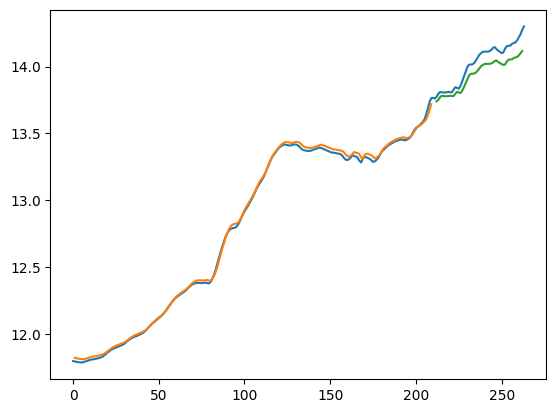

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming df_zipcode1_11211['Log'] is your log-transformed series
log_series = df_zipcode1_11211['Log'].dropna().values
log_series = log_series.reshape(-1, 1)

# Normalize the dataset
scaler = MinMaxScaler()
log_series_scaled = scaler.fit_transform(log_series)

# Split data into training and test sets
train_size = int(len(log_series_scaled) * 0.8)
train, test = log_series_scaled[0:train_size], log_series_scaled[train_size:]

# Convert data to the right shape
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape to [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions and target to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate mean absolute error
trainMAE = mean_absolute_error(trainY[0], trainPredict[:,0])
testMAE = mean_absolute_error(testY[0], testPredict[:,0])
print('Train MAE: {:.2f}'.format(trainMAE))
print('Test MAE: {:.2f}'.format(testMAE))

# Plot baseline, training and test predictions
plt.plot(scaler.inverse_transform(log_series_scaled))
trainPredictPlot = np.empty_like(log_series_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(log_series_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(log_series_scaled)-1, :] = testPredict

plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


Despite the successfull prediction of LSTM, we will not proceed with it for forecasting due to:

Data requirements: LSTMs require a large amount of data to train effectively. This can be a challenge for time series data, which is often limited in size.

Overfitting: LSTMs can be prone to overfitting, especially when the training data is small or noisy. This can lead to poor performance on new data.

Interpretability: LSTMs are not as interpretable as some other forecasting models, such as ARIMA. This can make it difficult to understand why the model is making the predictions it is making.

Complexity: LSTMs are complex models, and they can be difficult to train and tune. This can make them a challenge to use for non-experts.


# SARIMAX


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  211
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 723.258
Date:                            Thu, 31 Aug 2023   AIC                          -1436.516
Time:                                    15:11:19   BIC                          -1420.075
Sample:                                05-01-1996   HQIC                         -1429.861
                                     - 11-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7016      0.041     16.975      0.000       0.621       0.783
ma.L1          0.5916      0.037   

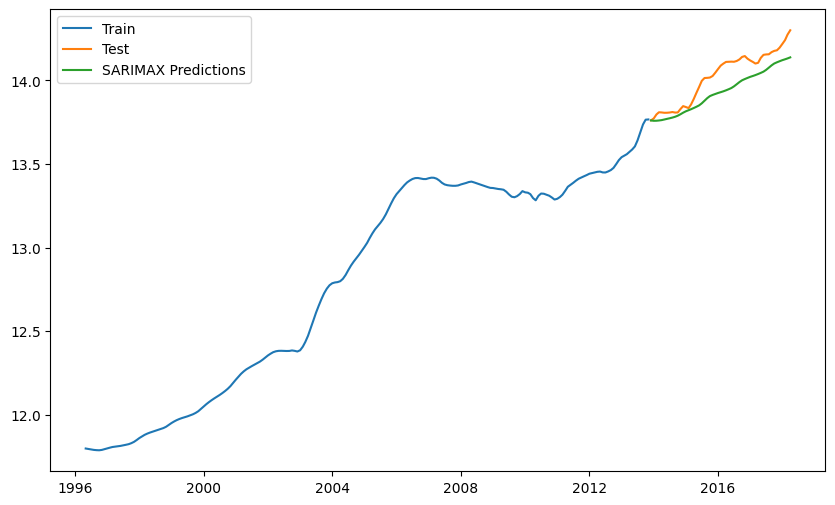

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Assuming df_zipcode1_11211['Log'] is your log-transformed series
data = df_zipcode1_11211['Log'].dropna()

# Splitting data into training and test sets
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

# SARIMAX model fitting
# p, d, q are non-seasonal parameters
# P, D, Q are seasonal parameters
# S is the periodicity (12 for monthly, 4 for quarterly)
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fitted = model.fit()

# Summary of the model
print(model_fitted.summary())

# Make predictions
start = len(train)
end = start + len(test) - 1
predictions = model_fitted.predict(start=start, end=end, dynamic=False)

# Mean Absolute Error
mae = mean_absolute_error(test, predictions)
print('Mean Absolute Error on test set:', mae)

# Visualization of the results
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='SARIMAX Predictions')
plt.legend(loc='best')
plt.show()


#SARIMAX Model Interpretation

**Model Information**:

**Dep. Variable**: This is your dependent variable, which is the log-transformed series 'Log'.

**No. Observations**: The number of observations used in the model

**Log Likelihood:** This is the log of the likelihood function, which is a measure of how well the model fits the observed data.

**AIC and BIC**: These are the Akaike and Bayesian Information Criteria, respectively. Both are measures of the goodness of fit of the model.
Lower values generally indicate a better-fitting model.

**Coefficient Table**:

**coef:** These are the coefficients for each term in the model. These are estimated from the training data.

**std err**: This is the standard error of the estimate for each coefficient.

**z**: This is the test statistic used to test whether each coefficient is significantly different from zero.

**P>|z|**: This is the p-value associated with the test statistic.

**Ljung-Box (L1) (Q) and Prob(Q)**: These are statistics that help to check the residual errors.

**Jarque-Bera (JB) and Prob(JB)**: These are used to check whether the residuals are normally distributed. A large JB or a small Prob(JB) indicates non-normality.

**Heteroskedasticity (H) and Prob(H):** These are tests for constant variance (homoskedasticity) of the residuals.

**Skew and Kurtosis**: These are measures that describe the shape of the distribution of the residuals.

###Interpretation

The AIC and BIC values are lower than those in the ARIMA model, suggesting that this model fits your data better.

The p-values for all coefficients are less than 0.05, suggesting that all terms are significant.

The MAE (Mean Absolute Error) on the test set is 0.0895, which is lower than the MAE from your ARIMA model (0.3015). This suggests that the SARIMAX model is better at predicting your test set.

The residuals seem to be well-behaved: the p-value for the Ljung-Box test is above 0.05, suggesting that residuals are independently distributed.

The Prob(JB) being close to zero indicates non-normality in the residuals, but this isn't a huge concern if the model is otherwise well-specified.

**Overall, the SARIMAX model seems to be a good fit and performs better than the ARIMA model based on AIC, BIC, and MAE metrics.**

# Forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  211
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 723.258
Date:                            Thu, 31 Aug 2023   AIC                          -1436.516
Time:                                    16:06:45   BIC                          -1420.075
Sample:                                05-01-1996   HQIC                         -1429.861
                                     - 11-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7016      0.041     16.975      0.000       0.621       0.783
ma.L1          0.5916      0.037   

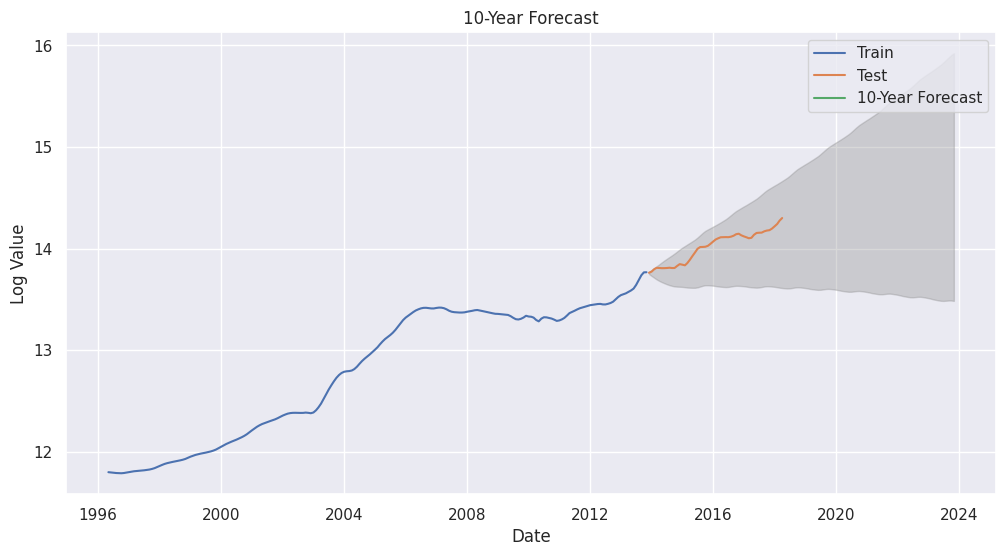

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

data = df_zipcode1_11211['Log'].dropna()

# Split the data
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

# SARIMAX model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fitted = model.fit(disp=False)

# Summary of the model
print(model_fitted.summary())

# Make predictions on the test set
start = len(train)
end = start + len(test) - 1
predictions = model_fitted.predict(start=start, end=end, dynamic=False)

# Make 10-year out-of-sample forecast
future_steps = 12 * 10  # 12 months per year for 10 years
forecast = model_fitted.get_forecast(steps=future_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Print the forecasted values
print("Forecasted values for the next 10 years:")
print(forecast_mean)

# Create a DataFrame for plotting
forecast_df = pd.DataFrame({'Forecast': forecast_mean}, index=pd.date_range(start=test.index[-1], periods=future_steps, freq='M'))

# Visualization of forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='10-Year Forecast')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='grey', alpha=.3)
plt.xlabel('Date')
plt.ylabel('Log Value')
plt.legend(loc='best')
plt.title('10-Year Forecast')
plt.show()


#**Transfer the analysis done on one zip code to the rest of the zipcodes from the data frame**

1. Extract each zipcode into its own data frame
2.Transform the data frames from wide format to long formart
3. Set data as the index and begin time series analysis
4. Vizualise the data frames
5. Detrend the data using Log Transformation and Differencing
6. Test the data for stationarity
7. Commence modeling

In [ ]:
# We first start by displaying the Data frame we are targeting
# Display first 5 rows with specific columns
print(sorted_annualized_roi_df.loc[:4, ['RegionName', 'City', 'CountyName', 'Annualized_ROI']])

       RegionName          City CountyName  Annualized_ROI
117         11211      New York      Kings       11.847669
1155        11222      New York      Kings       11.571663
475         11216      New York      Kings       11.308317
191          7302   Jersey City     Hudson       11.056640
106         11215      New York      Kings       10.831426
...           ...           ...        ...             ...
12016       13116         Minoa   Onondaga        2.047164
6938        13815       Norwich   Chenango        2.045872
12692       39663  Silver Creek   Lawrence        2.045789
12343       13480   Sangerfield     Oneida        2.045744
4           79936       El Paso    El Paso        2.045507

[12014 rows x 4 columns]


**zip1_11211, zip2_11222, zip3_11216, zip4_7302 and zip5_11215**

In [ ]:
# create a function that selects zipcode by rank from dataframe sorted_annualised_roi_df and returns a DataFrame of the zip code
def get_dataframe_by_rank(df, rank):
    selected_zipcode = df.iloc[rank-1]  # subtract 1 because of 0-based indexing
    return pd.DataFrame([selected_zipcode])

df_zip1 = get_dataframe_by_rank(sorted_annualized_roi_df, 1)
df_zip2 = get_dataframe_by_rank(sorted_annualized_roi_df, 2)
df_zip3 = get_dataframe_by_rank(sorted_annualized_roi_df, 3)
df_zip4 = get_dataframe_by_rank(sorted_annualized_roi_df, 4)
df_zip5 = get_dataframe_by_rank(sorted_annualized_roi_df, 5)


##Melt Rest of the zipcode data

In [ ]:
# create a function that selects specific columns from the ZipCode and melts the data (converting from wide fomart to long)

def transform_df(df):
    subset_columns = df.columns[7:272]
    df_subset = df[subset_columns]
    return pd.melt(df_subset, var_name='Date', value_name='Value')

df_zip1Transformed = transform_df(df_zip1)
df_zip2Transformed = transform_df(df_zip2)
df_zip3Transformed = transform_df(df_zip3)
df_zip4Transformed = transform_df(df_zip4)
df_zip5Transformed = transform_df(df_zip5)



##Convert the date columns to datetime and set them as indexes

In [ ]:
# create a function that converts the "date" column into datetime and sets it as the index

def set_date_as_index(df):
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)
    return df

# Applying the function to each DataFrame
df_zip1Transformed = set_date_as_index(df_zip1Transformed)
df_zip2Transformed = set_date_as_index(df_zip2Transformed)
df_zip3Transformed = set_date_as_index(df_zip3Transformed)
df_zip4Transformed = set_date_as_index(df_zip4Transformed)
df_zip5Transformed = set_date_as_index(df_zip5Transformed)


## Visualize the zipcodes

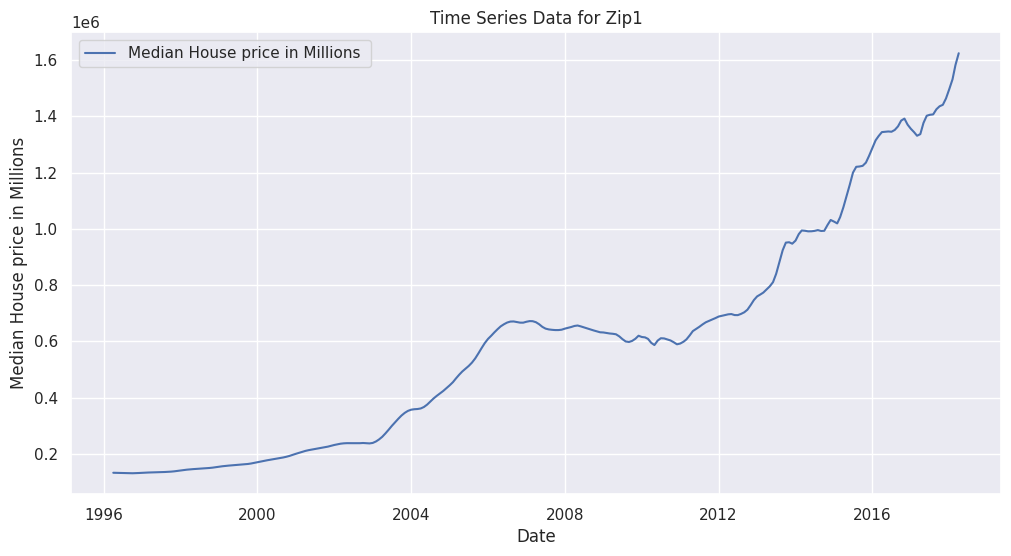

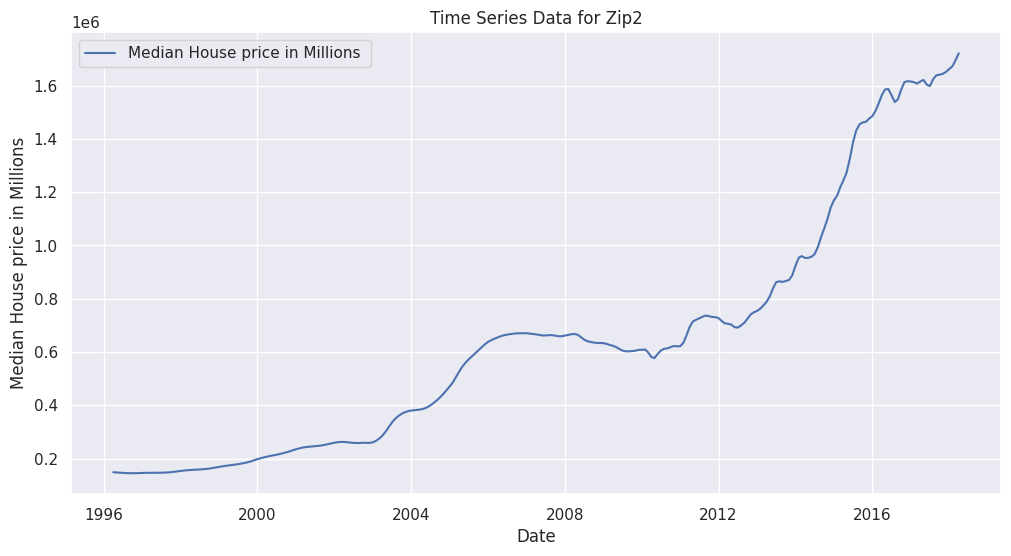

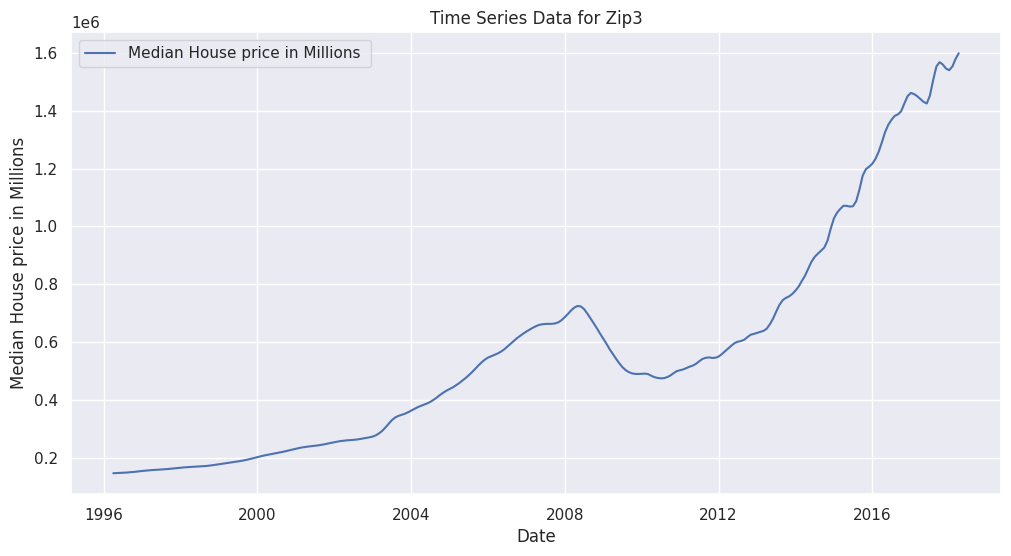

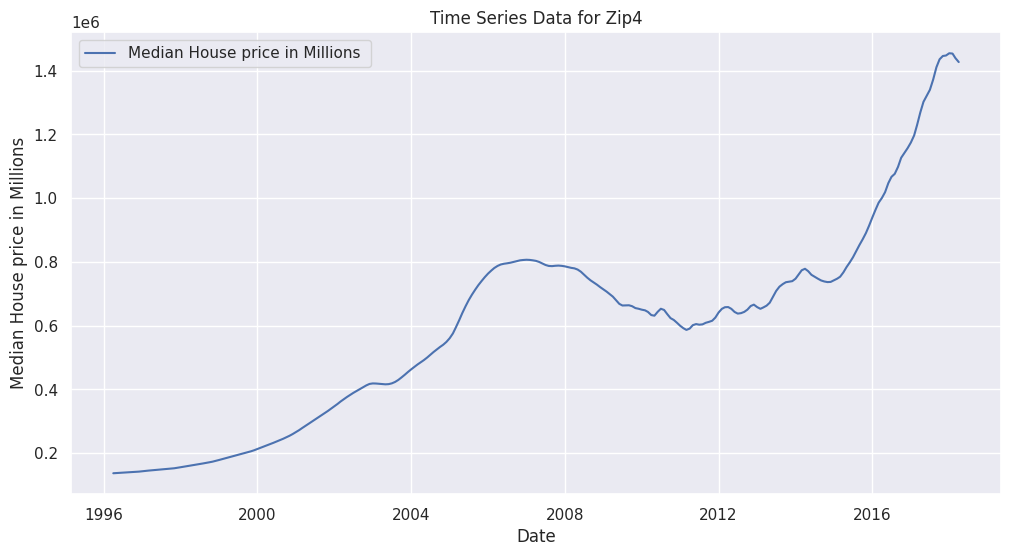

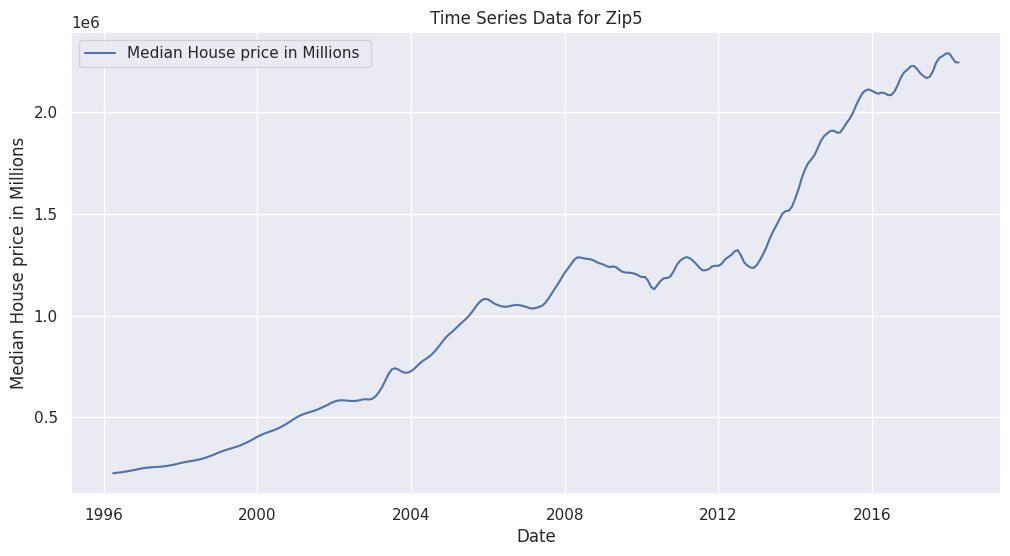

In [ ]:
#visualie zipcode data from the 1st ranked to the 5th ranked zip code
dataframes = {
    'Zip1': df_zip1Transformed,
    'Zip2': df_zip2Transformed,
    'Zip3': df_zip3Transformed,
    'Zip4': df_zip4Transformed,
    'Zip5': df_zip5Transformed
}

for zip_name, dataframe in dataframes.items():
    df_temp = dataframe.copy()

    plt.figure(figsize=(12, 6))
    plt.plot(df_temp.index, df_temp['Value'], label='Median House price in Millions ')
    plt.title(f'Time Series Data for {zip_name}')
    plt.xlabel('Date')
    plt.ylabel('Median House price in Millions')
    plt.legend()
    plt.grid(True)
    plt.show()


Next step functions
1. Convert the datetime index into integer timestamps.
2. Fill missing values with the mean of the 'Value' column.
3. Run the Dickey-Fuller test on the original data.
4. Apply a log transformation followed by differencing.
5. Run the Dickey-Fuller test on the log-transformed and differenced data.
6. Visualize the detrended data.


Dickey-Fuller Test - Original Data (Zip1):
ADF Statistic: 1.9884026968017572
p-value: 0.9986576909330424

Dickey-Fuller Test - Log and Differenced Data (Zip1):
ADF Statistic: -2.8492056831634964
p-value: 0.051581557814423626


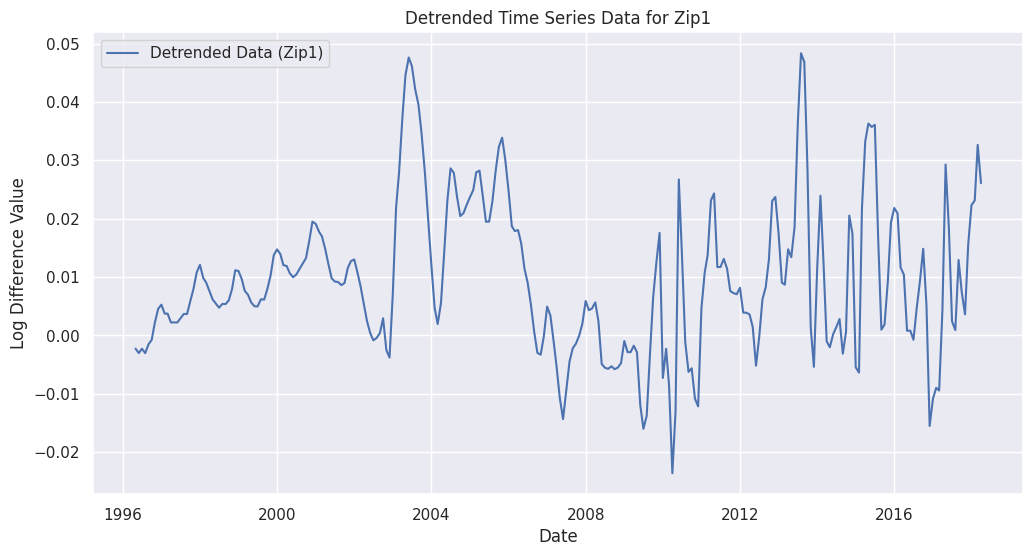


Dickey-Fuller Test - Original Data (Zip2):
ADF Statistic: 1.024405112050671
p-value: 0.994516891675093

Dickey-Fuller Test - Log and Differenced Data (Zip2):
ADF Statistic: -2.742197357674006
p-value: 0.06701656258929359


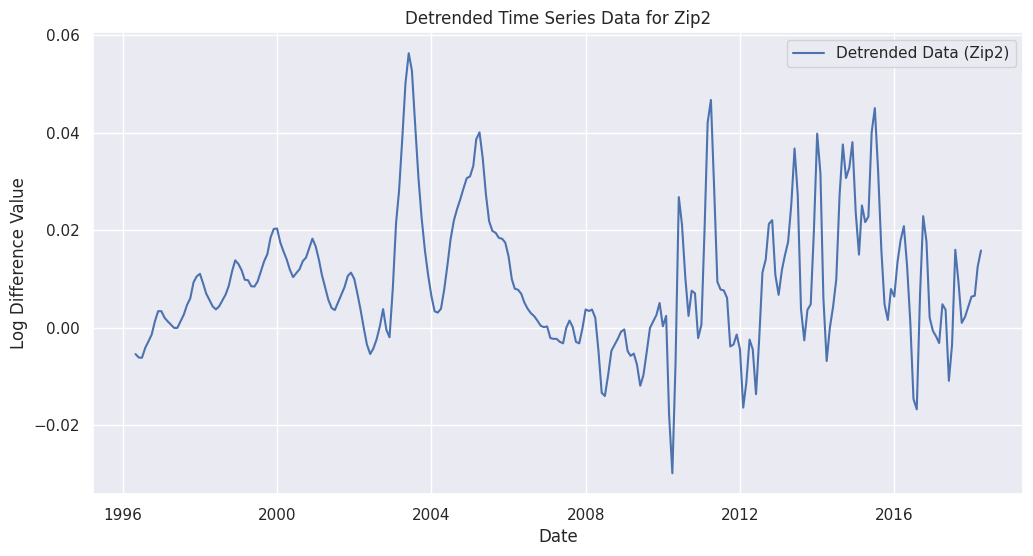


Dickey-Fuller Test - Original Data (Zip3):
ADF Statistic: 0.20315570191031343
p-value: 0.9724380332622604

Dickey-Fuller Test - Log and Differenced Data (Zip3):
ADF Statistic: -2.2585836425996986
p-value: 0.18567354068434694


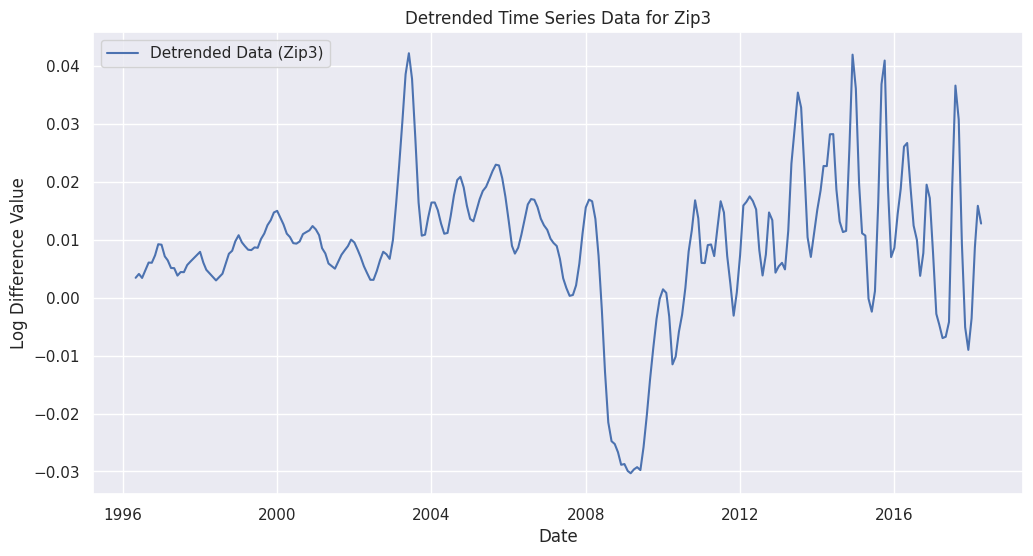


Dickey-Fuller Test - Original Data (Zip4):
ADF Statistic: -0.5499497232374685
p-value: 0.8818951286500799

Dickey-Fuller Test - Log and Differenced Data (Zip4):
ADF Statistic: -1.820323967274497
p-value: 0.37041910802889655


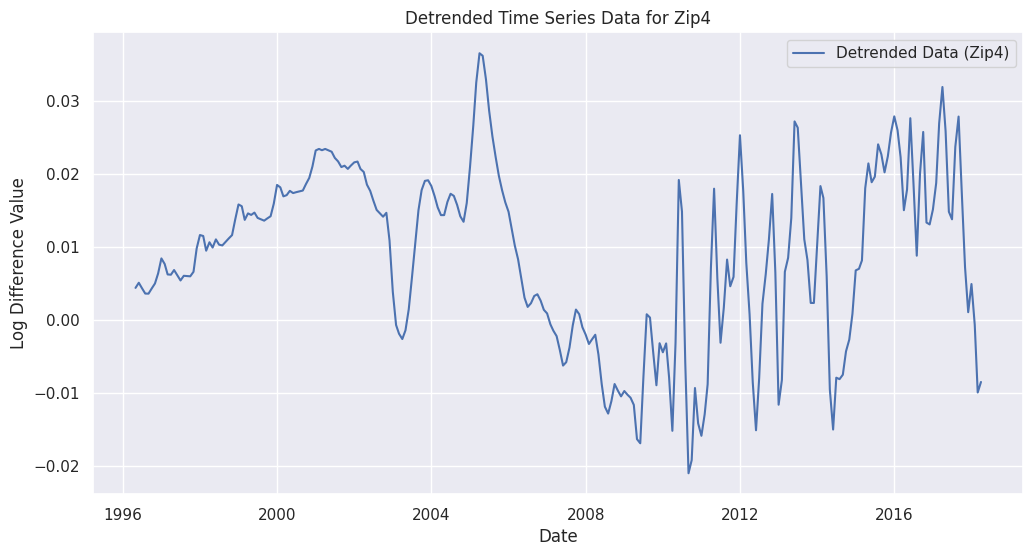


Dickey-Fuller Test - Original Data (Zip5):
ADF Statistic: 0.46462596760145386
p-value: 0.9837573347851625

Dickey-Fuller Test - Log and Differenced Data (Zip5):
ADF Statistic: -2.747316107708038
p-value: 0.06620224607529503


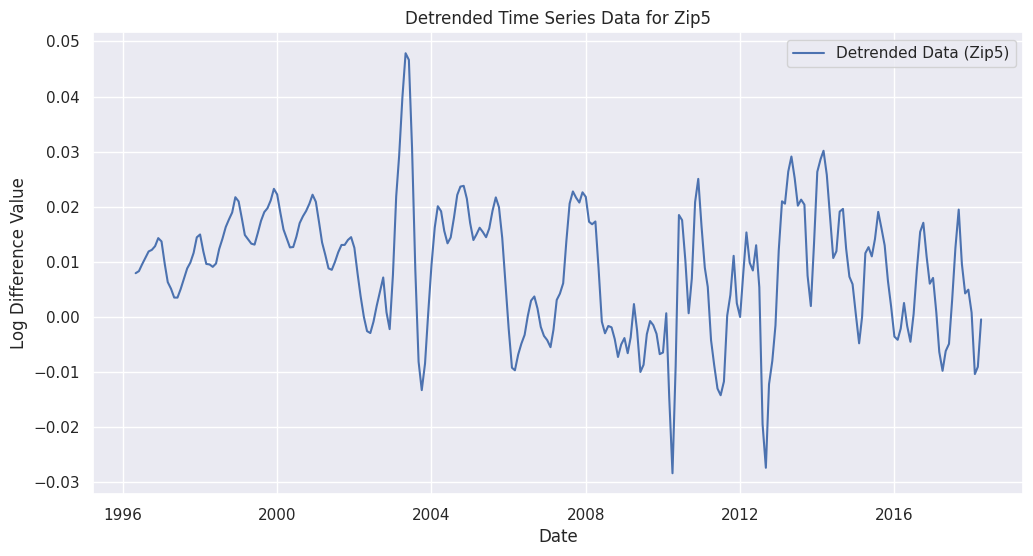

In [ ]:
def preprocess_and_detrend(df, zip_name):
    # Convert datetime index into integer timestamps and scale
    x_values = df.index.astype(int) / 1e18

    # Replace missing values with the mean
    mean_value = df['Value'].mean()
    df['Value'].fillna(mean_value, inplace=True)

    # Dickey-Fuller test on original data
    result_original = adfuller(df['Value'])
    print(f"\nDickey-Fuller Test - Original Data ({zip_name}):")
    print("ADF Statistic:", result_original[0])
    print("p-value:", result_original[1])

    # Log Transformation and Differencing
    df['Log'] = np.log(df['Value'])
    df['Log_Diff'] = df['Log'].diff()

    # Dickey-Fuller test on log-transformed and differenced data
    result_log_diff = adfuller(df['Log_Diff'].dropna())
    print(f"\nDickey-Fuller Test - Log and Differenced Data ({zip_name}):")
    print("ADF Statistic:", result_log_diff[0])
    print("p-value:", result_log_diff[1])

    # Visualize the detrended data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Log_Diff'], label=f'Detrended Data ({zip_name})')
    plt.title(f'Detrended Time Series Data for {zip_name}')
    plt.xlabel('Date')
    plt.ylabel('Log Difference Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Applying the function to each DataFrame
dataframes = {
    'Zip1': df_zip1Transformed,
    'Zip2': df_zip2Transformed,
    'Zip3': df_zip3Transformed,
    'Zip4': df_zip4Transformed,
    'Zip5': df_zip5Transformed
}

for zip_name, dataframe in dataframes.items():
    preprocess_and_detrend(dataframe, zip_name)


# NEXT: MODELING
## SARIMAX Model
### SARIMAX Proved to be effective when modeling the singe zipcode

###Modeling will take the following steps

1. splits the data into a training set (80% of the data) and a test set (20% of the data).
2. Fits a SARIMAX model to the training data.
3. Prints a summary of the model.
4. Uses the model to make predictions for the test set.
5. Calculates the Mean Absolute Error of the predictions.
6. Finally, it plots the training data, test data, and SARIMAX predictions.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



SARIMAX Model Summary for Zip1:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  212
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 721.765
Date:                            Thu, 31 Aug 2023   AIC                          -1433.530
Time:                                    17:37:01   BIC                          -1417.064
Sample:                                04-01-1996   HQIC                         -1426.866
                                     - 11-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7833      0.040     19.382      0.000       0.704       0.862
ma

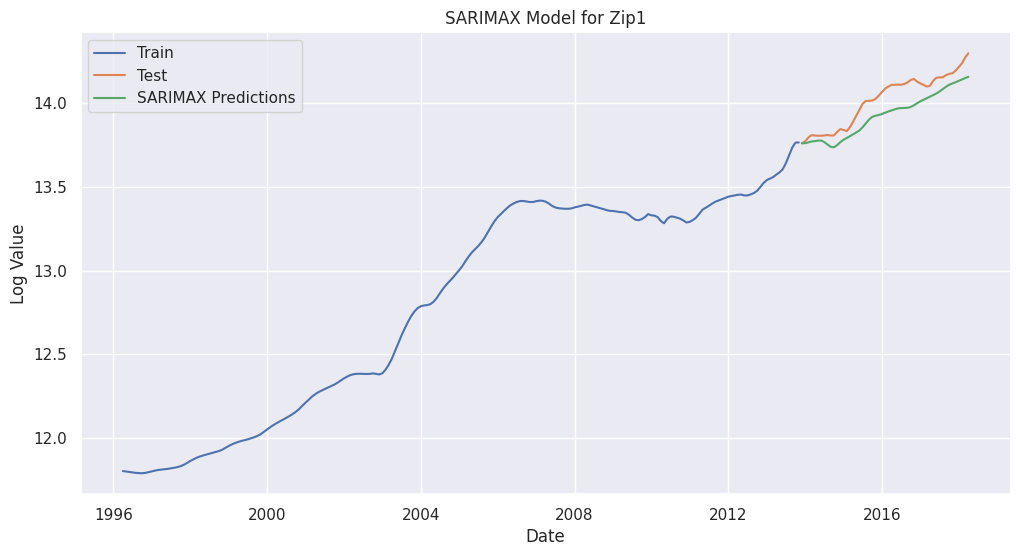

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



SARIMAX Model Summary for Zip2:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  212
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 747.428
Date:                            Thu, 31 Aug 2023   AIC                          -1484.855
Time:                                    17:37:10   BIC                          -1468.389
Sample:                                04-01-1996   HQIC                         -1478.191
                                     - 11-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8046      0.034     23.918      0.000       0.739       0.871
ma

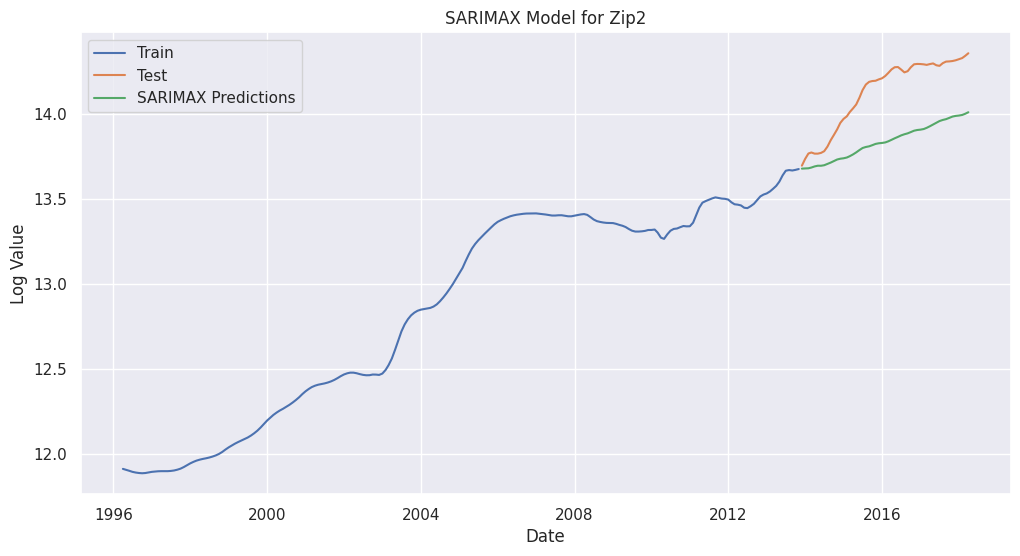

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



SARIMAX Model Summary for Zip3:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  212
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 834.173
Date:                            Thu, 31 Aug 2023   AIC                          -1658.346
Time:                                    17:37:12   BIC                          -1641.879
Sample:                                04-01-1996   HQIC                         -1651.681
                                     - 11-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8629      0.025     35.166      0.000       0.815       0.911
ma

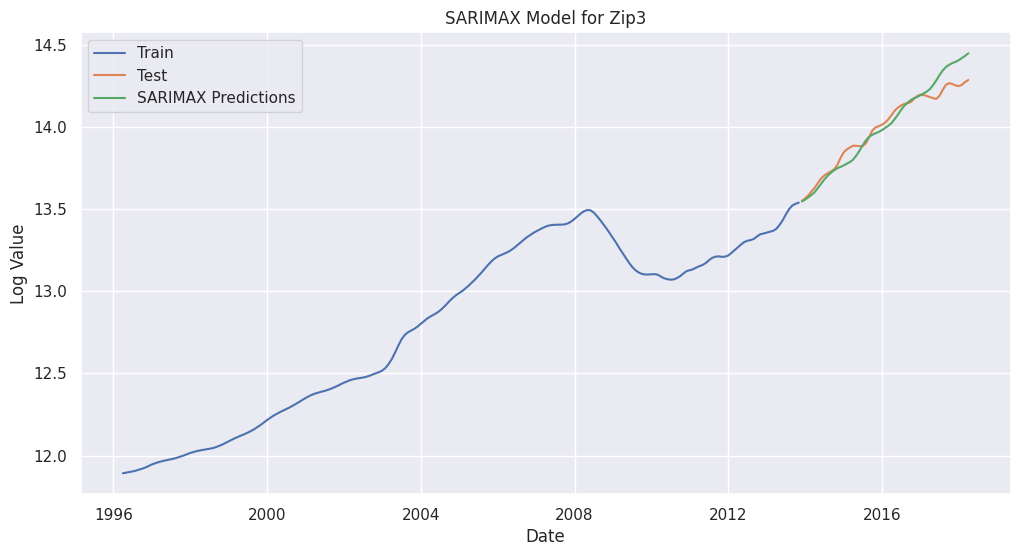

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



SARIMAX Model Summary for Zip4:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  212
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 762.937
Date:                            Thu, 31 Aug 2023   AIC                          -1515.875
Time:                                    17:37:17   BIC                          -1499.408
Sample:                                04-01-1996   HQIC                         -1509.210
                                     - 11-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6776      0.043     15.810      0.000       0.594       0.762
ma

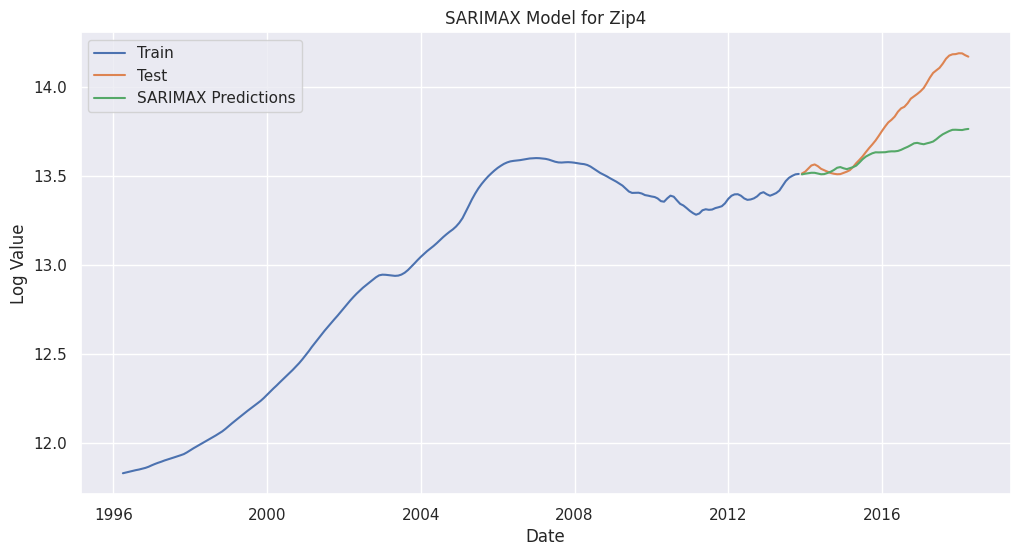

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



SARIMAX Model Summary for Zip5:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  212
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 736.976
Date:                            Thu, 31 Aug 2023   AIC                          -1463.952
Time:                                    17:37:18   BIC                          -1447.486
Sample:                                04-01-1996   HQIC                         -1457.288
                                     - 11-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6786      0.046     14.676      0.000       0.588       0.769
ma

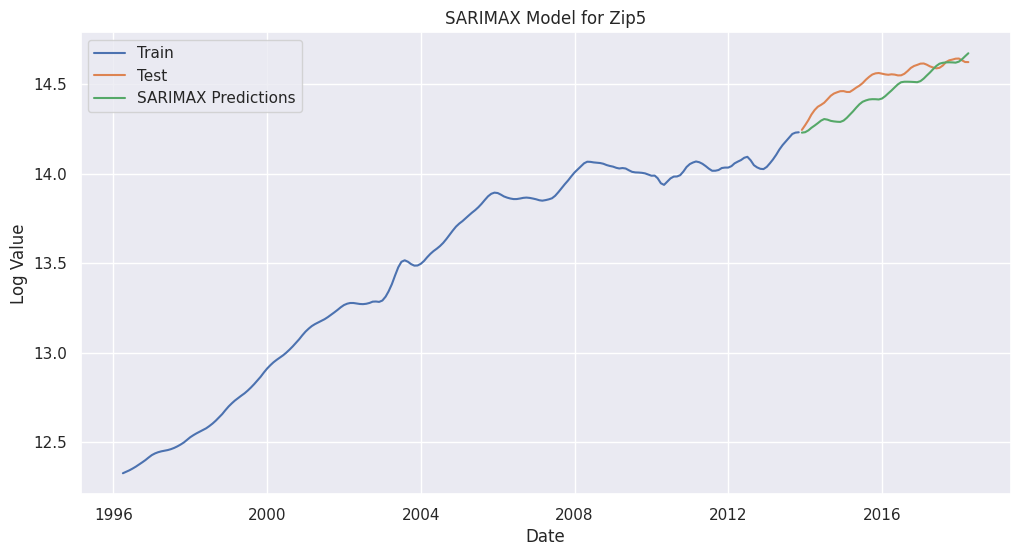

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

def apply_sarimax(df, zip_name):
    # Assuming that the DataFrame df already has the column 'Log'
    # and you want to model it

    # Drop missing values from 'Log'
    df.dropna(subset=['Log'], inplace=True)

    # Split the data into training and test sets
    train_size = int(len(df['Log']) * 0.8)
    train, test = df['Log'][:train_size], df['Log'][train_size:]

    # Fit the SARIMAX model
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fitted = model.fit()

    # Summary of the model
    print(f"\nSARIMAX Model Summary for {zip_name}:")
    print(model_fitted.summary())

    # Make predictions
    start = len(train)
    end = start + len(test) - 1
    predictions = model_fitted.predict(start=start, end=end, dynamic=False)

    # Calculate Mean Absolute Error
    mae = mean_absolute_error(test, predictions)
    print(f'Mean Absolute Error on test set for {zip_name}:', mae)

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[:train_size], train, label='Train')
    plt.plot(df.index[train_size:], test, label='Test')
    plt.plot(df.index[train_size:], predictions, label='SARIMAX Predictions')
    plt.title(f"SARIMAX Model for {zip_name}")
    plt.xlabel('Date')
    plt.ylabel('Log Value')
    plt.legend()
    plt.show()

# Assuming dataframes is a dictionary where the keys are the zip names
# and the values are the corresponding DataFrames
dataframes = {
    'Zip1': df_zip1Transformed,
    'Zip2': df_zip2Transformed,
    'Zip3': df_zip3Transformed,
    'Zip4': df_zip4Transformed,
    'Zip5': df_zip5Transformed
}

for zip_name, dataframe in dataframes.items():
    apply_sarimax(dataframe, zip_name)


# Forecasting

This function, **apply_sarimax_and_forecast**, takes a DataFrame and a zip_name.
It fits a SARIMAX model to the entire data set, then makes future forecasts for the next 5 years.
It plots the actual and forecasted values for easy visualization.

The forecasted_values dictionary will contain the forecasted values for each zipcode, which we can use for further analysis or visualization.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



SARIMAX Model Summary for Zip1:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  265
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 906.024
Date:                            Thu, 31 Aug 2023   AIC                          -1802.049
Time:                                    17:56:00   BIC                          -1784.402
Sample:                                04-01-1996   HQIC                         -1794.948
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7397      0.045     16.575      0.000       0.652       0.827
ma

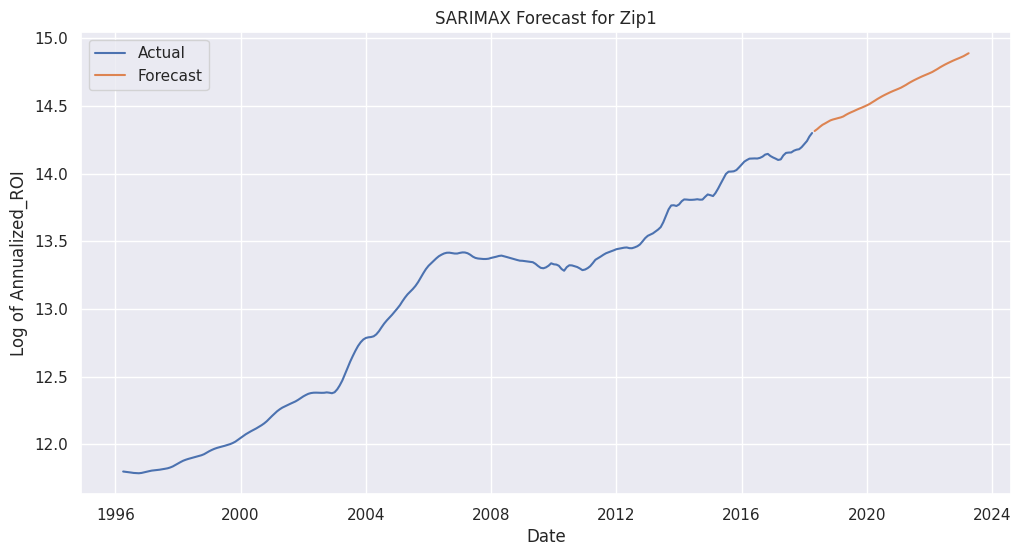

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



SARIMAX Model Summary for Zip2:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  265
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 858.404
Date:                            Thu, 31 Aug 2023   AIC                          -1706.807
Time:                                    17:56:02   BIC                          -1689.160
Sample:                                04-01-1996   HQIC                         -1699.707
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6116      0.056     10.973      0.000       0.502       0.721
ma

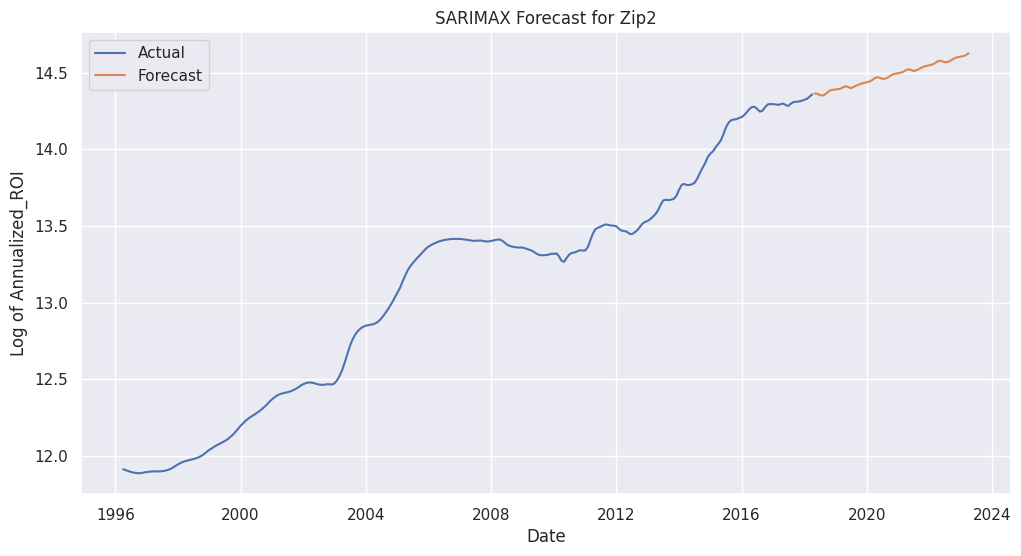

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



SARIMAX Model Summary for Zip3:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  265
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 972.744
Date:                            Thu, 31 Aug 2023   AIC                          -1935.488
Time:                                    17:56:05   BIC                          -1917.841
Sample:                                04-01-1996   HQIC                         -1928.387
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7816      0.029     26.666      0.000       0.724       0.839
ma

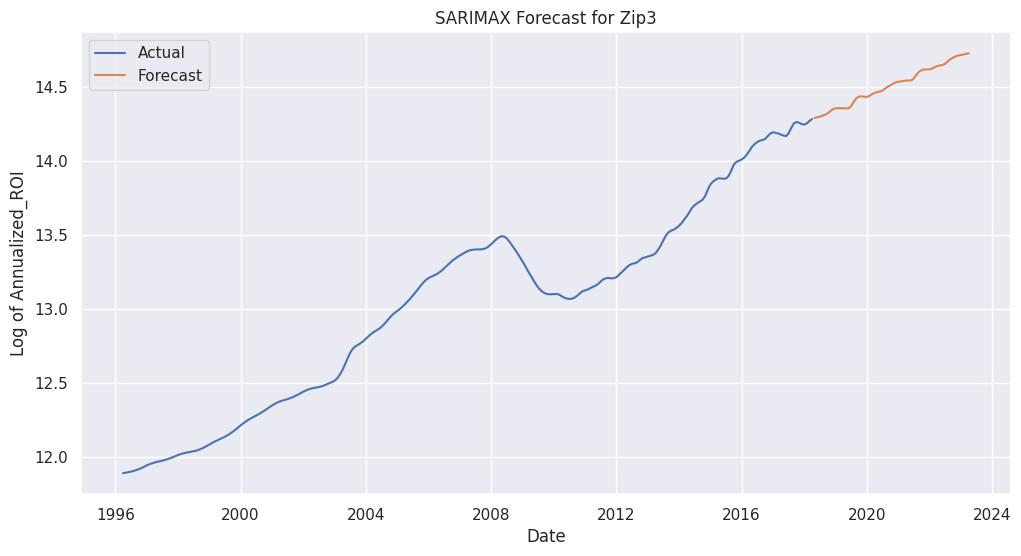

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



SARIMAX Model Summary for Zip4:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  265
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 971.003
Date:                            Thu, 31 Aug 2023   AIC                          -1932.006
Time:                                    17:56:07   BIC                          -1914.359
Sample:                                04-01-1996   HQIC                         -1924.905
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6818      0.038     17.731      0.000       0.606       0.757
ma

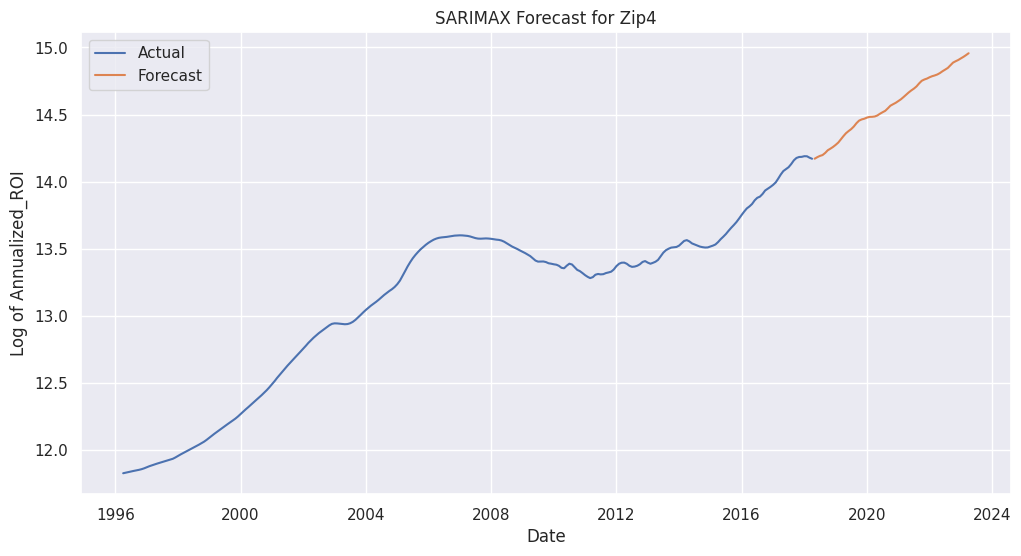

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



SARIMAX Model Summary for Zip5:
                                     SARIMAX Results                                      
Dep. Variable:                                Log   No. Observations:                  265
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 933.623
Date:                            Thu, 31 Aug 2023   AIC                          -1857.246
Time:                                    17:56:11   BIC                          -1839.598
Sample:                                04-01-1996   HQIC                         -1850.145
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6654      0.044     14.960      0.000       0.578       0.753
ma

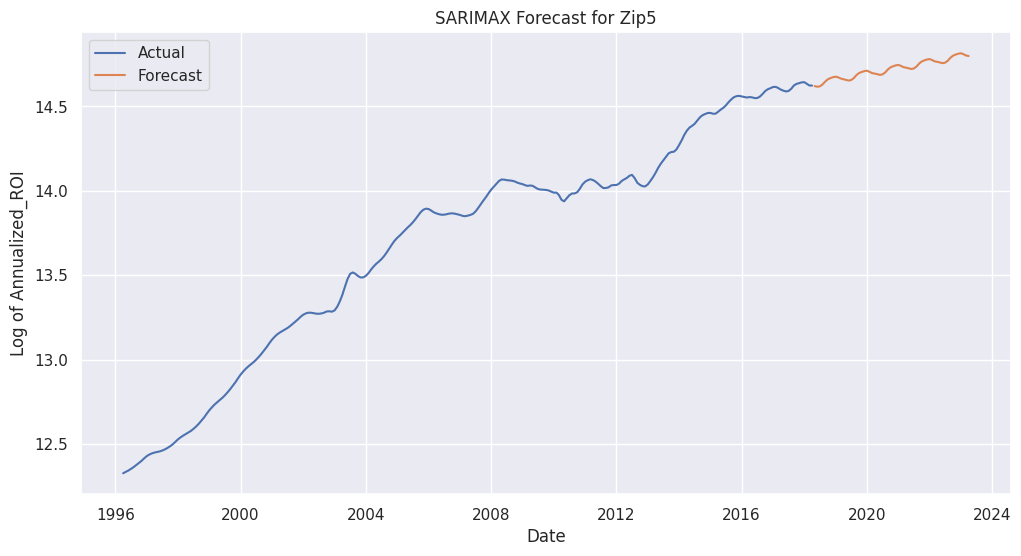

In [ ]:
from pandas.tseries.offsets import DateOffset

def apply_sarimax_and_forecast(df, zip_name):

    # and you want to model it

    # Drop missing values from 'Log'
    df.dropna(subset=['Log'], inplace=True)

    # Fit the SARIMAX model to the entire dataset
    model = SARIMAX(df['Log'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fitted = model.fit()

    # Summary of the model
    print(f"\nSARIMAX Model Summary for {zip_name}:")
    print(model_fitted.summary())

    # Make future forecasts for next 5 years (5 years * 12 months = 60 months)
    future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 61)]
    future_dates_df = pd.DataFrame(index=future_dates, columns=df.columns)
    future_df = pd.concat([df, future_dates_df])

    start = len(df)
    end = start + 60 - 1  # 60 months for 5 years
    future_df['Forecast'] = model_fitted.predict(start=start, end=end, dynamic=False)

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Log'], label='Actual')
    plt.plot(future_df.index[start:], future_df['Forecast'][start:], label='Forecast')
    plt.title(f"SARIMAX Forecast for {zip_name}")
    plt.xlabel('Date')
    plt.ylabel('Log of Annualized_ROI')
    plt.legend()
    plt.show()

    return future_df['Forecast'][start:]

# Assuming dataframes is a dictionary where the keys are the zip names
# and the values are the corresponding DataFrames
dataframes = {
    'Zip1': df_zip1Transformed,
    'Zip2': df_zip2Transformed,
    'Zip3': df_zip3Transformed,
    'Zip4': df_zip4Transformed,
    'Zip5': df_zip5Transformed
}

forecasted_values = {}

for zip_name, dataframe in dataframes.items():
    forecasted_values[zip_name] = apply_sarimax_and_forecast(dataframe, zip_name)


# Forecasting

### Print the forecated ROI for each zipcode for the next 5 Years

In [ ]:
def print_forecasted_values(forecasted_values):
    for zip_name, forecast in forecasted_values.items():
        print(f"\nForecasted values for {zip_name} for the next 5 years:")
        print(forecast)

# Call the function after you have your forecasted_values
print_forecasted_values(forecasted_values)



Forecasted values for Zip1 for the next 5 years:
2018-05-01    14.314865
2018-06-01    14.329453
2018-07-01    14.345833
2018-08-01    14.360879
2018-09-01    14.371499
2018-10-01    14.382452
2018-11-01    14.393442
2018-12-01    14.400088
2019-01-01    14.405343
2019-02-01    14.410817
2019-03-01    14.415298
2019-04-01    14.422720
2019-05-01    14.434367
2019-06-01    14.444858
2019-07-01    14.453681
2019-08-01    14.462114
2019-09-01    14.471278
2019-10-01    14.479740
2019-11-01    14.487608
2019-12-01    14.495816
2020-01-01    14.505043
2020-02-01    14.514812
2020-03-01    14.526539
2020-04-01    14.538737
2020-05-01    14.551006
2020-06-01    14.562463
2020-07-01    14.573220
2020-08-01    14.583359
2020-09-01    14.592860
2020-10-01    14.601952
2020-11-01    14.610631
2020-12-01    14.618396
2021-01-01    14.626536
2021-02-01    14.635135
2021-03-01    14.644901
2021-04-01    14.655806
2021-05-01    14.667902
2021-06-01    14.679095
2021-07-01    14.689328
2021-08-01    

### Visualize forcased ROI for the next 5 years

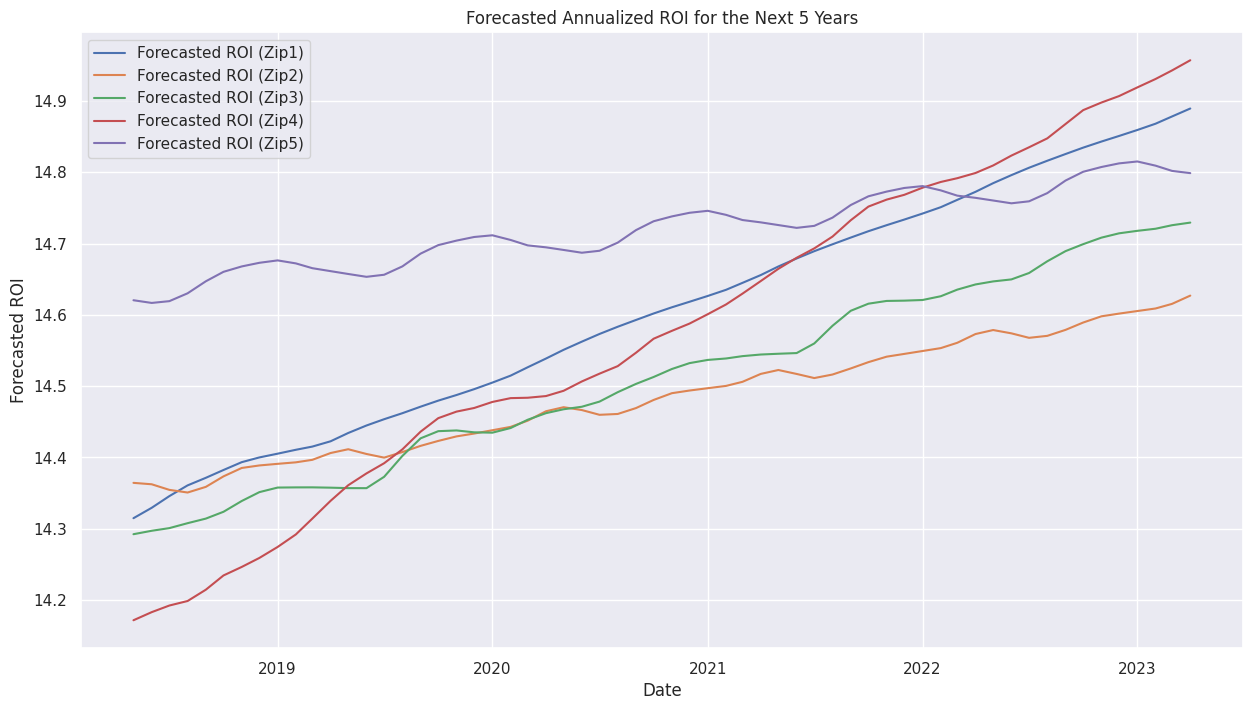

In [ ]:

def plot_forecasted_values(forecasted_values):
    plt.figure(figsize=(15, 8))

    for zip_name, forecast in forecasted_values.items():
        plt.plot(forecast.index, forecast, label=f"Forecasted ROI ({zip_name})")

    plt.title("Forecasted Annualized ROI for the Next 5 Years")
    plt.xlabel("Date")
    plt.ylabel("Forecasted ROI")
    plt.legend()
    plt.show()

# Call the function after you have your forecasted_values
plot_forecasted_values(forecasted_values)


# Recommendations

Diversify Investments: To manage risk and capture market dynamics, diversify your portfolio across analyzed states

Explore Oyster Bay: With ample data,

Prioritize ROI: Focus on cities with higher Return on Investment (ROI) figures for lucrative opportunities.

Consider Location: Factor in city attributes, growth potential, amenities, and demand when making investment choices.

In summary, diversification, ROI emphasis, risk evaluation, and location considerations are key in USA real estate investment decisions.

# Conclusion

Based on our model assumptions, the selected zipcode will continue to experience an
anualised ROI of about 14% which should lead in singnificant growth in their investments
• Therefore it will be prudent to consider investing in any these 5 zipcodes
1. 11211 – New York Kings
2. 11222 – New York Kings
3. 11216 – New York Kings
4. 7302 – Jersy City Hudson
5. 11215 – New York Kings